In [1]:
%%html
<!-- Global site tag (gtag.js) - Google Analytics -->
<script async src="https://www.googletagmanager.com/gtag/js?id=UA-162045285-1"></script>
<script>
  window.dataLayer = window.dataLayer || [];
  function gtag(){dataLayer.push(arguments);}
  gtag('js', new Date());

  gtag('config', 'UA-162045285-1');
</script>


# Covid-19 Analysis

## Presentazione del Report
Analisi della situazione italiana del Covid-19 basata sui dati della Protezione Civile. I dati sono aggiornati alle 18.30 e sono recuperati dal repository https://github.com/pcm-dpc/COVID-19. Per aggiornare i dati rilanciare il presente Notebook.

> Questo Report è stato sviluppando usando Jupyter Lab un tool che permette la scrittura di codice Python tramite Browser. 
Il codice sorgente è disponibile all'indirizzo https://github.com/pasalino/Covid-19-PyAnalysis .

> **Sono gradite le Star (stelline in alto a destra della pagina).** <br/>
> Sono graditi commenti e suggerimenti che potete inviare all'indirizzo pasalino@gmail.com oppure sulla pagina https://github.com/pasalino/Covid-19-PyAnalysis/issues .<br/>
> Qui tutte le nuove funzionalità e la Roadmap del report https://pasalino.github.io/Covid-19-PyAnalysis



## Disclosure e scarico di responsabilità

Questo report non vuole sostituirsi alle fonti ufficiali, ma ne va a completamento. Non consideratelo una fonte ufficiale ma una lettura dei dati ufficiali da un punto di vista matematico.
Non mi ritengo responsabile della diffusione di questo report se non nei limiti delal condivisione di pensiero atta a comprendere meglio i dati. I dati in questo report, non sono analizzati da esperti di settore e quindi proni ad errori.
Potrebbero esserci errori e inesattezze nel codice che produce i dati. Attraverso la pagina sopra indicata è possibile indicarle.

## Indice

In [2]:
%%html
<div id="toc"></div>

In [3]:
%%javascript
$( document ).ready(function() {
    const l = $("<a href='#Indice' class='link_index'> ^ Torna su</a>");
    l.insertAfter('h2');
    l.insertAfter('h3');
    l.insertAfter('h4');
    console.log( "ready!" );
});

<IPython.core.display.Javascript object>

In [4]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

In [5]:
import os
import subprocess
import pandas as pd 
import datetime
import matplotlib
import math
import numpy as np
from scipy import stats
from IPython.display import display, Markdown, Latex
from matplotlib import pyplot as plt
from matplotlib.dates import date2num

In [6]:
PROTEZIONE_CIVILE_REPO = 'git@github.com:pcm-dpc/COVID-19.git'
CURRENT_DIR = os.path.join(os.getcwd())
DATA_DIR = os.path.join(os.getcwd(),'data')
REPO_DIR = os.path.join(os.getcwd(),DATA_DIR,'repo')

In [7]:
COLORS = ['tomato', 'seagreen', 'magenta', 'deepskyblue', 'plum', 'orange', 'royalblue',]
COL_TOTALE_CASI = '#1376f7'
COL_ATTUALMENTE_POSITIVI = '#d30202'
COL_DECEDUTI = '#8D09B3'
COL_DIFF_POSITIVI = '#d11212'
COL_GUARITI = 'deepskyblue'
COL_TOT_RICOVERATI = '#FF352D'
COL_ISOLAMENTO_DOMICILIARE = '#FDCEB5'
COL_TERAPIA_INTENSIVA = "#B34220"
COL_RICOVERATI ='#FF7554'
COL_TAMPONI= '#bce079'

COL_AVG= 'green'

NAME_LABELS= {
    'data':'DATA', 
    'ricoverati_con_sintomi':'RICOVERATI', 
    'terapia_intensiva':'TERAPIA INT.',
    'totale_ospedalizzati':'TOT. RICOV.',
    'isolamento_domiciliare':'ISOLAME. DOM.',
    'totale_attualmente_positivi':'TOT. POSITIVI',
    'nuovi_attualmente_positivi':'DIFF. POSITIVI',
    'totale_nuovi_positivi':'TOT. NUOVI POS.',
    'dimessi_guariti':'GUARITI',
    'deceduti':'DECEDUTI',
    'totale_casi':'CASI TOTALI',
    'tamponi':'TAMPONI'    
}

In [8]:
if not os.path.isdir(REPO_DIR):
    p = subprocess.Popen(['git', 'clone', '--single-branch', '-b', 'master', PROTEZIONE_CIVILE_REPO, REPO_DIR])
    p.wait()
else:
    os.chdir(REPO_DIR)
    p = subprocess.Popen(['git', 'pull'])
    p.wait()
    os.chdir(REPO_DIR)
    os.chdir(CURRENT_DIR)

## Articoli di interesse per capire i numeri

* Articolo de Il Sole 24Ore che da un senso ai numeri indicati dalla protezione civile [QUI](https://www.ilsole24ore.com/art/gli-attualmente-contagiati-e-nuovi-positivi-rebus-ogni-sera-ADGG5tF)
* Articolo del Corriere della Sera che ci da una previsione secondo Einaudi Institute for Economincs and Finance (non di settore ma nemmeno degli sprovveduti [QUI](https://www.corriere.it/economia/lavoro/20_marzo_30/coronavirus-italia-quando-si-azzereranno-contagi-previsioni-regione-regione-ae9099dc-7264-11ea-bc49-338bb9c7b205.shtml). 
* Articolo in cui l'Intelligenza Artificiale prova a stimare la fine dell'epidemia [QUI](https://it-blastingnews-com.cdn.ampproject.org/c/s/it.blastingnews.com/cronaca/2020/03/in-casa-fino-a-meta-giugno-a-lavoro-da-settembre-lintelligenza-artificiale-da-le-nuove-previsioni-003100255.amp.html)

## Legenda

* **CASI TOTALI**: Il numero di casi totali riscontrati rispetto al giorno giorno prima. Include guariti e morti
* **DIFF. POSITIVI**: Il numero di casi che sono la differenza dei totali riscontrati in quel giorno meno i guariti e i morti (vedi l'articolo de Il Sole 24ore per capire)
* **ATTUALMENTE POSITIVI**: Il numero dei casi che sono attualmente contagiati

## Ultimo aggiornamento dei dati dalla protezione civile
Questa data è l'ultimo aggiornamento ai dati della protezione civile a cui si riferisce questo Report

In [9]:
os.chdir(REPO_DIR)
p = subprocess.Popen(['git', 'log', '-1', '--format=%cd'], stdout=subprocess.PIPE)
p.wait()
stdout = p.communicate()[0]
out = stdout.decode("utf-8").strip()
display(Markdown(f'**' + out + '**'))
os.chdir(CURRENT_DIR)

**Tue May 12 19:27:58 2020 +0200**

In [10]:
plt.rcParams['figure.figsize'] = [20, 7]

In [11]:
def beautify_graph(ax):
    ax.legend(loc="upper left")
    ax.set_xlabel('Date')
    ax.grid(b=True, which='major', color='#888888', linestyle=':')
    ax.minorticks_on()
    ax.grid(b=True, which='minor', color='#AAAAAA', linestyle=':', alpha=0.5)
    ax.tick_params(which='both', width=1)
    ax.tick_params(which='major', length=14)
    ax.tick_params(axis="x", which='minor', length=0, color='gray')
    ax.tick_params(axis="y", which='minor', length=8, color='gray')
    
def show_table(df, tail=1):
    if 'DATA' in df.columns:
        df = df.drop('DATA',axis=1)
    if 'data' in df.columns:
        df = df.drop('data',axis=1)
    return df.rename(columns = NAME_LABELS).tail(tail)

def interpolation(data):
    slope, intercept, r_value, p_value, std_err = stats.linregress(range(len(data)), data)
    x_max= math.floor(-intercept/slope)
    x_int=[0, x_max]
    y_int=[intercept, x_max * slope + intercept]
    
    start_date = datetime.datetime.strptime(data.index[0],'%d-%b-%y')
    x_label = [datetime.datetime.strftime(start_date + datetime.timedelta(days = x),'%d-%b-%y') for x in range(x_max)]
    series = data.tolist() + [0 for x in range(x_max-len(data))]
    
    return x_int, y_int, x_label, series

def xinterpolate(serie):
    X_mean = len(serie)/2
    Y_mean = np.mean(serie)
    num = 0
    den = 0
    for i in range(1, len(serie)):
        num += (i - X_mean)*(serie[i] - Y_mean)
        den += (i - X_mean)**2
    m = num / den
    c = Y_mean - m*X_mean
    x_max= abs(c/m)
    return[1, x_max], [m+c, m*x_max+c]
    #return c,m
    
def xinterpolate_2(serie):
    X_mean = len(serie)/2
    Y_mean = np.mean(serie)
    num = 0
    den = 0
    for i in range(1, len(serie)):
        num += (i - X_mean)*(serie[i] - Y_mean)
        den += (i - X_mean)**2
    m = num / den
    c = Y_mean - m*X_mean
    #x_max= abs(c/m)
    return c,m


## Dati Nazionali

In [12]:
national_trend_read = pd.read_csv(os.path.join(REPO_DIR,'dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv'))
national_trend_read['totale_attualmente_positivi'] = national_trend_read['totale_positivi']
national_trend_read['nuovi_attualmente_positivi'] = national_trend_read['variazione_totale_positivi']
national_trend = pd.DataFrame()
national_trend['DATA'] = pd.to_datetime(national_trend_read['data']).dt.strftime('%d-%b-%y')
national_trend['data'] = pd.to_datetime(national_trend_read['data']).dt.strftime('%d-%b-%y')

national_columns = ['totale_casi','totale_attualmente_positivi','nuovi_attualmente_positivi', 'dimessi_guariti', 'deceduti','totale_ospedalizzati',  'ricoverati_con_sintomi', 'terapia_intensiva',  'isolamento_domiciliare', 'tamponi']
for n in national_columns:
    national_trend[n] = national_trend_read[n]

national_trend.set_index(keys=['DATA'], append=False, inplace=True)
national_trend.index.rename('', inplace=True)

### I dati di oggi

In [13]:
incremental_data = pd.DataFrame()
incremental_columns = ['data','totale_casi','nuovi_attualmente_positivi', 'dimessi_guariti', 'deceduti','totale_ospedalizzati',  'ricoverati_con_sintomi', 'terapia_intensiva',  'isolamento_domiciliare', 'totale_attualmente_positivi','tamponi']

for c in incremental_columns:
    if c in ['nuovi_attualmente_positivi','data']:
        incremental_data[c] = national_trend[c]
    else:
        incremental_data[c] = national_trend[c] - national_trend[c].shift(1)
        incremental_data[c] = incremental_data[c].astype(pd.Int64Dtype())
    
incremental_data['CASI PER TAMPONE (%)']= (incremental_data['totale_casi']/incremental_data['tamponi']*100).round(2)

complete_incremental_data = incremental_data
incremental_data = incremental_data[1:]

In [14]:
show_table(incremental_data)

CASI TOTALI  DIFF. POSITIVI  GUARITI  DECEDUTI  TOT. RICOV.  \
                                                                         
12-May-20         1402           -1222     2452       172         -721   

           RICOVERATI  TERAPIA INT.  ISOLAME. DOM.  TOT. POSITIVI  TAMPONI  \
                                                                             
12-May-20        -674           -47           -501          -1222    67003   

           CASI PER TAMPONE (%)  
                                 
12-May-20                  2.09

### I dati cumulati di oggi

In [15]:
show_table(national_trend).drop('DIFF. POSITIVI', axis=1)

CASI TOTALI  TOT. POSITIVI  GUARITI  DECEDUTI  TOT. RICOV.  \
                                                                        
12-May-20       221216          81266   109039     30911        13817   

           RICOVERATI  TERAPIA INT.  ISOLAME. DOM.  TAMPONI  
                                                             
12-May-20       12865           952          67449  2673655

#### Grafico della progressione giornaliera
Ogni punto indica il numero di casi evidenziati in quel giorno

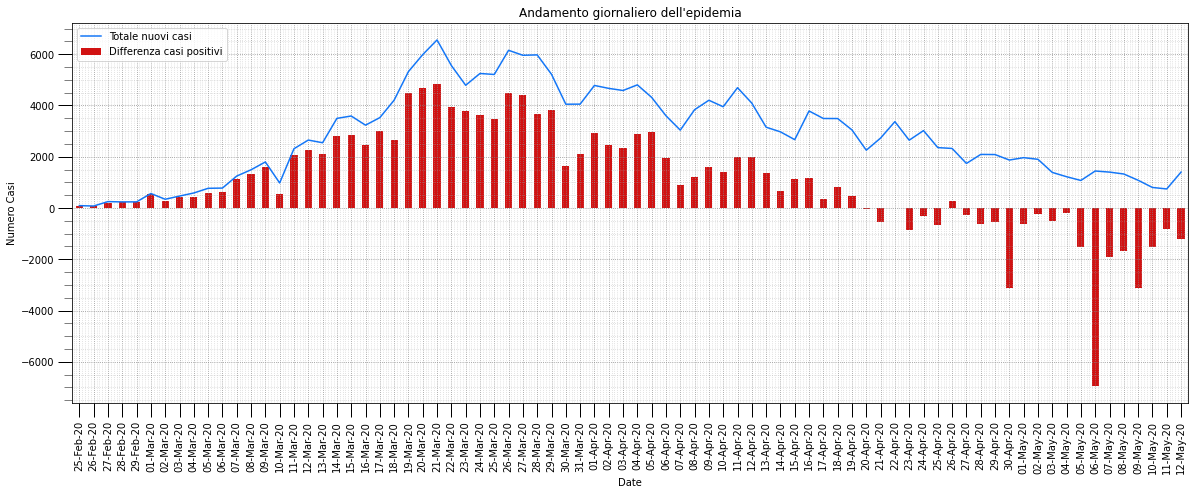

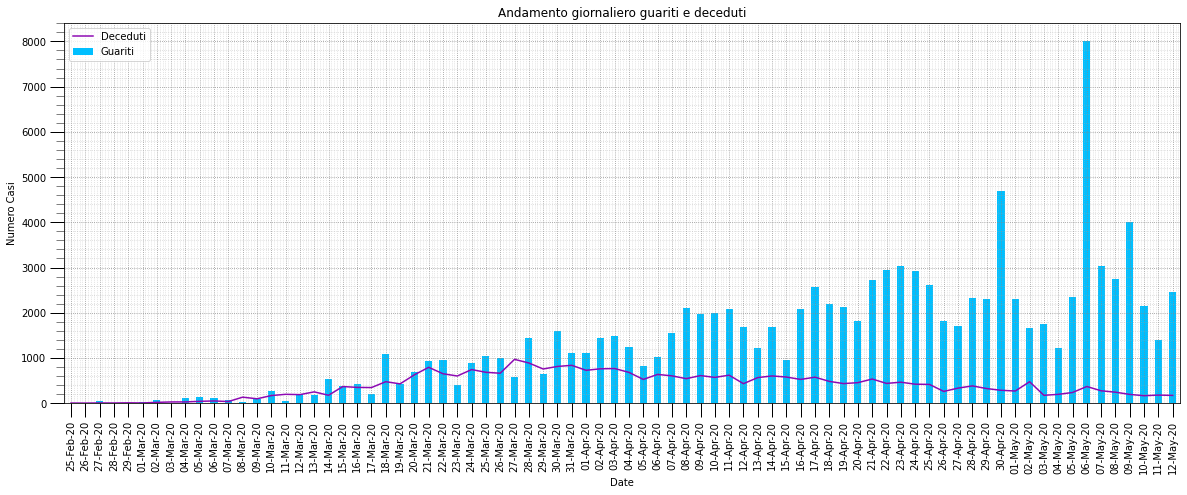

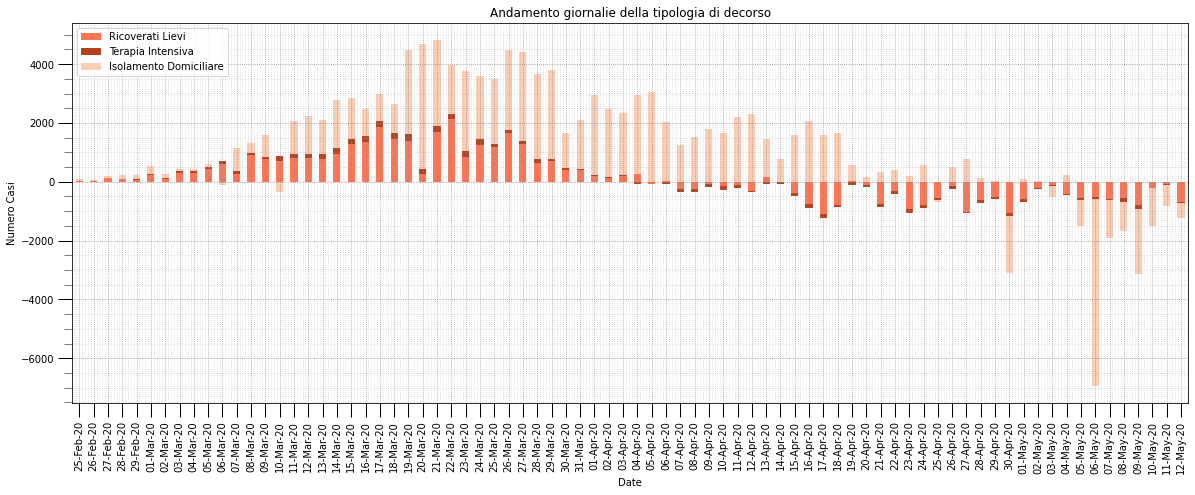

In [16]:
plot =['totale_casi']
legends = ["Totale nuovi casi"]
colors = [COL_TOTALE_CASI]
ax = incremental_data.plot(kind='line', x='data', y=plot, color=colors, rot=90, label=legends)
ax.set_ylabel('Numero Casi')
ax.set_title("Andamento giornaliero dell'epidemia")
beautify_graph(ax)


plot =['nuovi_attualmente_positivi']
legends = ["Differenza casi positivi"]
colors = [COL_DIFF_POSITIVI, COL_GUARITI, COL_DECEDUTI]
ay = incremental_data.plot(kind='bar', x='data', y=plot, color=colors, rot=90, label=legends,  ax=ax)
beautify_graph(ay)



plot =['deceduti']
legends = ["Deceduti"]
colors = [COL_DECEDUTI]
ax = incremental_data.plot(kind='line', x='data', y=plot, color=colors, rot=90, label=legends)
ax.set_ylabel('Numero Casi')
beautify_graph(ax)

plot =['dimessi_guariti']
legends = ["Guariti"]
colors = [COL_GUARITI, ]
ay = incremental_data.plot(kind='bar', x='data', y=plot, color=colors, rot=90, label=legends, ax=ax)
ay.set_title("Andamento giornaliero guariti e deceduti")
beautify_graph(ay)

#legends = ["Totale ospedalizzati"]
#colors = [COL_TOT_RICOVERATI]
#aw = incremental_data.plot(kind='line', x='data', y=['totale_ospedalizzati'], color=[COL_TOT_RICOVERATI], rot=90, label=legends)

plot =['ricoverati_con_sintomi', 'terapia_intensiva','isolamento_domiciliare',]
legends = ["Ricoverati Lievi","Terapia Intensiva","Isolamento Domiciliare"]
colors = [COL_RICOVERATI, COL_TERAPIA_INTENSIVA, COL_ISOLAMENTO_DOMICILIARE]
az = incremental_data.plot(kind='bar', x='data', y=plot, color=colors, rot=90, stacked=True, label=legends)
az.set_title("Andamento giornalie della tipologia di decorso")
az.set_ylabel('Numero Casi')
beautify_graph(az)



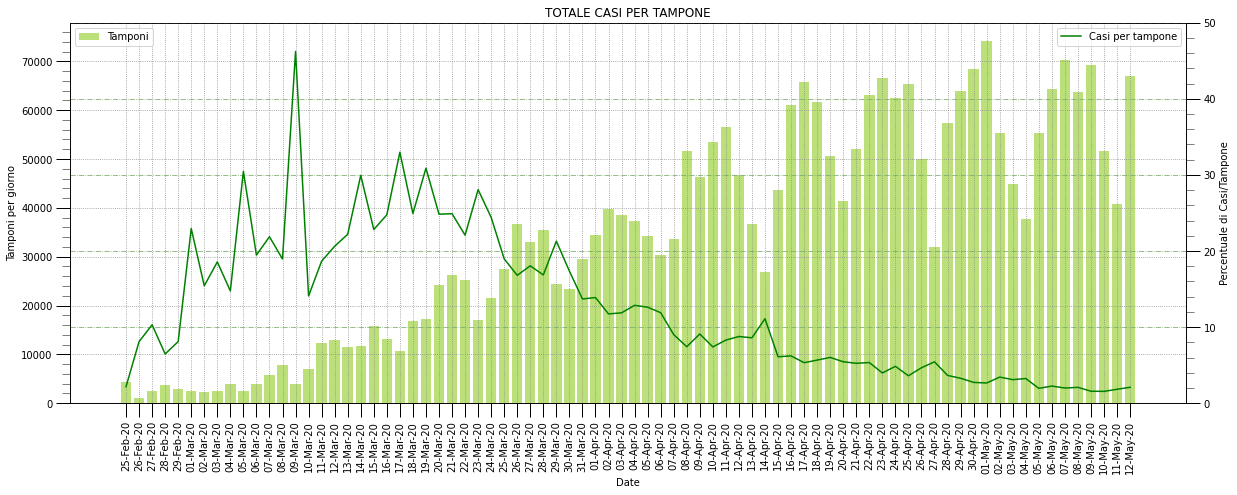

In [17]:


fig,ax = plt.subplots()

ax.bar(incremental_data['data'], incremental_data['tamponi'], label='Tamponi', color=COL_TAMPONI)
ax.legend(loc="upper left")
ax.set_xlabel('Date')
ax.grid(b=True, which='major', color='#888888', linestyle=':')
ax.minorticks_on()
ax.tick_params(which='both', width=1)
ax.tick_params(which='major', length=14)
ax.tick_params(axis="x", which='minor', length=0, color='gray')
ax.tick_params(axis="y", which='minor', length=8, color='gray')
ax.set_xticklabels(national_trend['data'], rotation=90)
ax.set_ylabel('Tamponi per giorno')

ax2 = ax.twinx()

ax2.plot(incremental_data['CASI PER TAMPONE (%)'], label='Casi per tampone', color=COL_AVG)
ax2.set_ylim(0,50)
ax2.set_title("TOTALE CASI PER TAMPONE")
ax2.set_ylabel('Percentuale di Casi/Tampone')


ax2.legend(loc="upper right")
ax2.set_xlabel('Date')
ax2.grid(b=True, which='major', color='#7eaa70', linestyle='dashdot')
ax2.minorticks_on()
ax2.tick_params(which='both', width=1)
ax2.tick_params(which='major', length=14)
ax2.tick_params(axis="y", which='minor', length=8, color='gray')
ax2


#### I dati incrementali degli ultimi 10 giorni

In [18]:

show_table(incremental_data.rename(columns=NAME_LABELS),10).drop('TOT. POSITIVI', axis=1)

CASI TOTALI  DIFF. POSITIVI  GUARITI  DECEDUTI  TOT. RICOV.  \
                                                                         
03-May-20         1389            -525     1740       174         -153   
04-May-20         1221            -199     1225       195         -441   
05-May-20         1075           -1513     2352       236         -605   
06-May-20         1444           -6939     8014       369         -595   
07-May-20         1401           -1904     3031       274         -617   
08-May-20         1327           -1663     2747       243         -681   
09-May-20         1083           -3119     4008       194         -936   
10-May-20          802           -1518     2155       165         -223   
11-May-20          744            -836     1401       179         -107   
12-May-20         1402           -1222     2452       172         -721   

           RICOVERATI  TERAPIA INT.  ISOLAME. DOM.  TAMPONI  \
                                                              
03-May-20        -115           -38           -372    44935   
04-May-20        -419           -22            242    37631   
05-May-20        -553           -52           -908    55263   
06-May-20        -501           -94          -6344    64263   
07-May-20        -595           -22          -1287    70359   
08-May-20        -538          -143           -982    63775   
09-May-20        -802          -134          -2183    69171   
10-May-20        -216            -7          -1295    51678   
11-May-20         -79           -28           -729    40740   
12-May-20        -674           -47           -501    67003   

           CASI PER TAMPONE (%)  
                                 
03-May-20                  3.09  
04-May-20                  3.24  
05-May-20                  1.95  
06-May-20                  2.25  
07-May-20                  1.99  
08-May-20                  2.08  
09-May-20                  1.57  
10-May-20                  1.55  
11-May-20                  1.83  
12-May-20                  2.09

#### I dati cumulati degli ultimi 10 giorni

In [19]:
show_table(national_trend.rename(columns = NAME_LABELS),10).drop('DIFF. POSITIVI', axis=1)

CASI TOTALI  TOT. POSITIVI  GUARITI  DECEDUTI  TOT. RICOV.  \
                                                                        
03-May-20       210717         100179    81654     28884        18743   
04-May-20       211938          99980    82879     29079        18302   
05-May-20       213013          98467    85231     29315        17697   
06-May-20       214457          91528    93245     29684        17102   
07-May-20       215858          89624    96276     29958        16485   
08-May-20       217185          87961    99023     30201        15804   
09-May-20       218268          84842   103031     30395        14868   
10-May-20       219070          83324   105186     30560        14645   
11-May-20       219814          82488   106587     30739        14538   
12-May-20       221216          81266   109039     30911        13817   

           RICOVERATI  TERAPIA INT.  ISOLAME. DOM.  TAMPONI  
                                                             
03-May-20       17242          1501          81436  2153772  
04-May-20       16823          1479          81678  2191403  
05-May-20       16270          1427          80770  2246666  
06-May-20       15769          1333          74426  2310929  
07-May-20       15174          1311          73139  2381288  
08-May-20       14636          1168          72157  2445063  
09-May-20       13834          1034          69974  2514234  
10-May-20       13618          1027          68679  2565912  
11-May-20       13539           999          67950  2606652  
12-May-20       12865           952          67449  2673655

### Andamento Nazionale
I dati cumulati nei giorni. Ci da idea di come sta evolvendo l'epidemia.

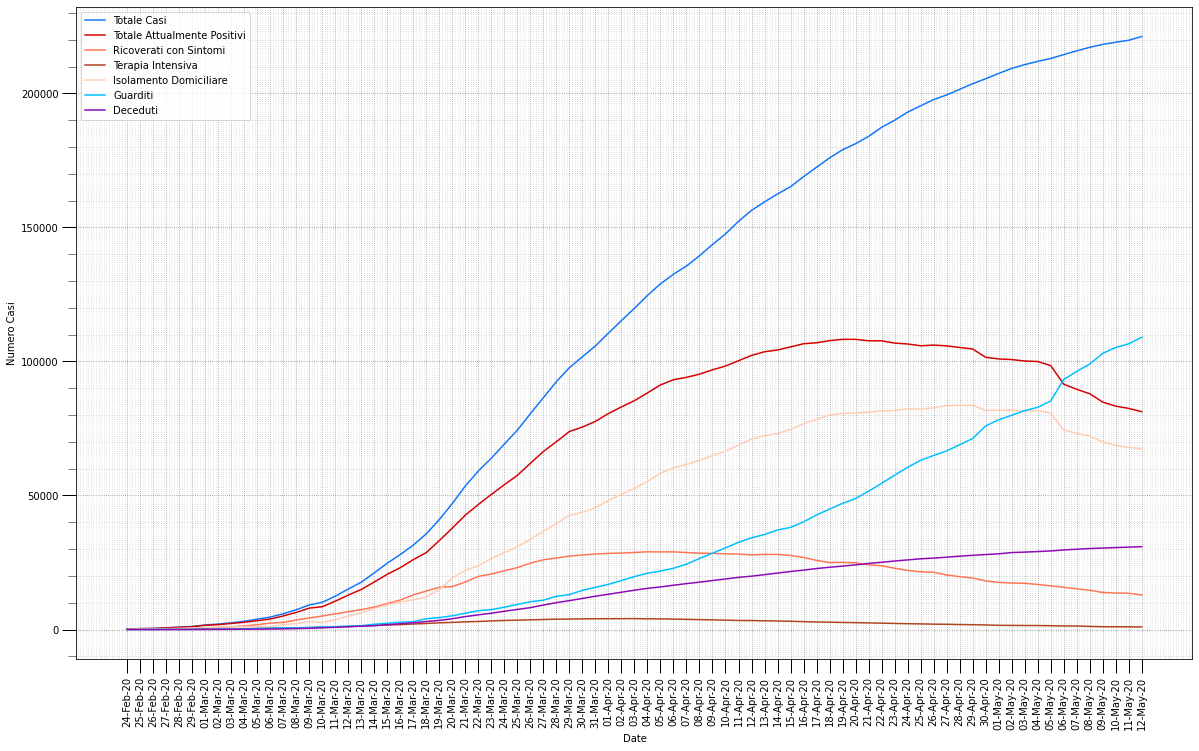

In [20]:
plt.rcParams['figure.figsize'] = [20, 12]
fig, ax = plt.subplots()

plot =['totale_casi','totale_attualmente_positivi','ricoverati_con_sintomi', 'terapia_intensiva','isolamento_domiciliare','dimessi_guariti','deceduti']
colors = [COL_TOTALE_CASI, COL_ATTUALMENTE_POSITIVI, COL_RICOVERATI, COL_TERAPIA_INTENSIVA, COL_ISOLAMENTO_DOMICILIARE, COL_GUARITI, COL_DECEDUTI]
legends = ["Totale Casi", "Totale Attualmente Positivi","Ricoverati con Sintomi","Terapia Intensiva","Isolamento Domiciliare","Guarditi", "Deceduti"]
for i in range(0,len(plot)):
    plt.plot(national_trend['data'], national_trend[plot[i]], color=colors[i], label=legends[i])

ax.set_xticklabels(national_trend['data'], rotation=90)
ax.set_ylabel('Numero Casi')

beautify_graph(ax)

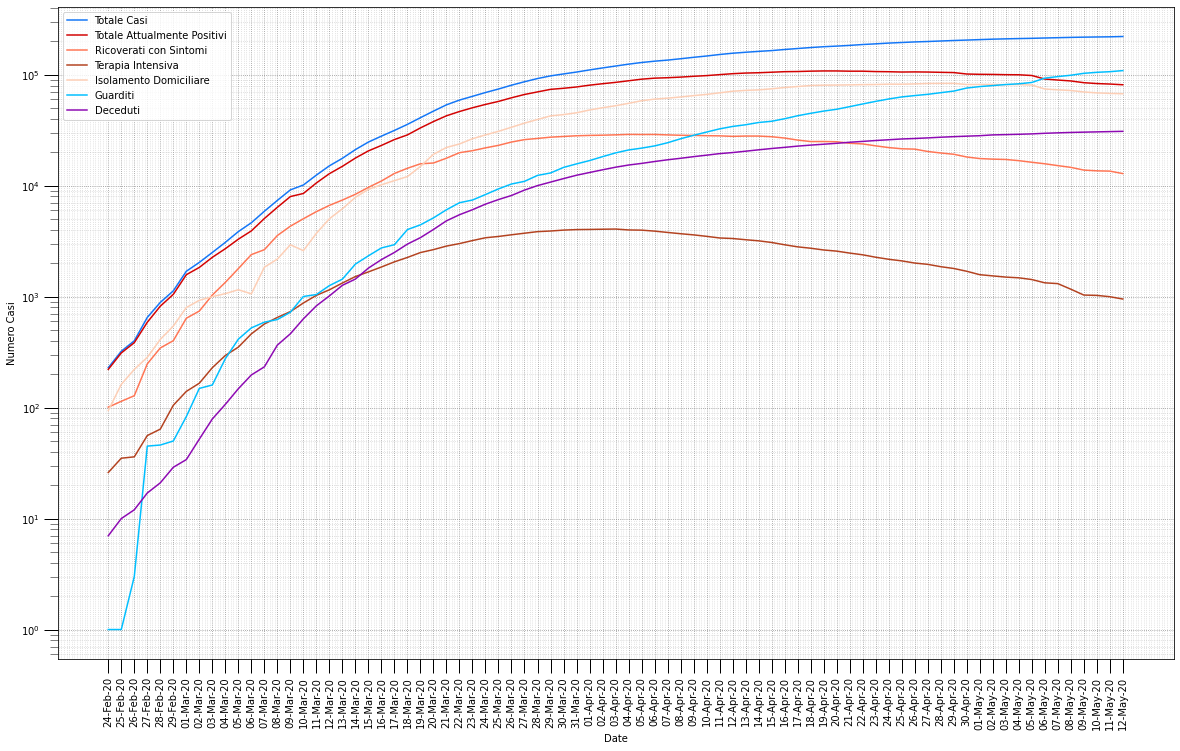

In [21]:

fig, ax = plt.subplots()
plt.yscale('log')
plot =['totale_casi','totale_attualmente_positivi','ricoverati_con_sintomi', 'terapia_intensiva','isolamento_domiciliare','dimessi_guariti','deceduti']
colors = [COL_TOTALE_CASI, COL_ATTUALMENTE_POSITIVI, COL_RICOVERATI, COL_TERAPIA_INTENSIVA, COL_ISOLAMENTO_DOMICILIARE, COL_GUARITI, COL_DECEDUTI]
legends = ["Totale Casi", "Totale Attualmente Positivi","Ricoverati con Sintomi","Terapia Intensiva","Isolamento Domiciliare","Guarditi", "Deceduti"]
for i in range(0,len(plot)):
    plt.plot(national_trend['data'], national_trend[plot[i]], color=colors[i], label=legends[i])

ax.set_xticklabels(national_trend['data'], rotation=90)
ax.set_ylabel('Numero Casi')

beautify_graph(ax)


### Percentuale di crescita
Le percentuali di crescita sono valori che danno idea rispetto al giorno precedente di come si muove l'epidemia.
Questi valori a causa del numero molto elevato di contagi è normale che scendano.

In [22]:
plt.rcParams['figure.figsize'] = [20, 7]
growth_rates = pd.DataFrame()
growth_rates['data'] = national_trend['data']
growth_rates_columns = ['totale_casi','nuovi_attualmente_positivi', 'totale_attualmente_positivi', 'dimessi_guariti', 'deceduti', 'totale_ospedalizzati', 'ricoverati_con_sintomi', 'terapia_intensiva', 'isolamento_domiciliare',  'tamponi']

for c in growth_rates_columns:
    growth_rates[c] = (national_trend[c] - national_trend[c].shift(1))/abs(national_trend[c].shift(1))*100
growth_rates= growth_rates.round(2)
growth_rates=growth_rates[1:]

In [23]:
show_table(growth_rates.rename(columns=NAME_LABELS),7)

CASI TOTALI  DIFF. POSITIVI  TOT. POSITIVI  GUARITI  DECEDUTI  \
                                                                           
06-May-20         0.68         -358.63          -7.05     9.40      1.26   
07-May-20         0.65           72.56          -2.08     3.25      0.92   
08-May-20         0.61           12.66          -1.86     2.85      0.81   
09-May-20         0.50          -87.55          -3.55     4.05      0.64   
10-May-20         0.37           51.33          -1.79     2.09      0.54   
11-May-20         0.34           44.93          -1.00     1.33      0.59   
12-May-20         0.64          -46.17          -1.48     2.30      0.56   

           TOT. RICOV.  RICOVERATI  TERAPIA INT.  ISOLAME. DOM.  TAMPONI  
                                                                          
06-May-20        -3.36       -3.08         -6.59          -7.85     2.86  
07-May-20        -3.61       -3.77         -1.65          -1.73     3.04  
08-May-20        -4.13       -3.55        -10.91          -1.34     2.68  
09-May-20        -5.92       -5.48        -11.47          -3.03     2.83  
10-May-20        -1.50       -1.56         -0.68          -1.85     2.06  
11-May-20        -0.73       -0.58         -2.73          -1.06     1.59  
12-May-20        -4.96       -4.98         -4.70          -0.74     2.57

### Trends e medie
Uno spaccato di alcuni dati.
Viene visualizzato anche il trend medio settimanale.
GR = Growth Rate - Fattore di crescita

In [24]:
avg_trend = pd.DataFrame()
avg_trend['data'] = national_trend['data']

avg_trend['totale_casi'] = national_trend['totale_casi']
avg_trend['totale_casi_percent'] = growth_rates['totale_casi']
avg_trend['avg_totale'] = growth_rates['totale_casi'].rolling(7).mean().round(2)

avg_trend['attualmente_positivi'] = national_trend['totale_attualmente_positivi']
avg_trend['attualmente_positivi_percent'] = (avg_trend['attualmente_positivi'] - avg_trend['attualmente_positivi'].shift(1))/abs(avg_trend['attualmente_positivi']).shift(1)*100
avg_trend['attualmente_positivi_percent']= avg_trend['attualmente_positivi_percent'].round(2)
avg_trend['avg_att_positivi'] = avg_trend['attualmente_positivi_percent'].rolling(7).mean().round(2)

avg_trend['dimessi_guariti'] = national_trend['dimessi_guariti']
avg_trend['dimessi_guariti_percent'] = growth_rates['dimessi_guariti']
avg_trend['avg_dimessi_guariti'] = growth_rates['dimessi_guariti'].rolling(7).mean().round(2)

avg_trend['deceduti'] = incremental_data['deceduti']
avg_trend['deceduti_percent'] = growth_rates['deceduti']
avg_trend['avg_deceduti'] = growth_rates['deceduti'].rolling(7).mean().round(2)

avg_trend['tamponi'] = incremental_data['tamponi']
avg_trend['tamponi_percent'] = growth_rates['tamponi']
avg_trend['avg_tamponi'] = growth_rates['tamponi'].rolling(7).mean().round(2)

* **CASI TOTALI GR**: Quando questo numero sarà zero, l'epidemia si sarà fermata e dovremmo aspettare che tutti siano guariti (Sperando che nessuno infetti altri).
* **NUOVI CASI TOTALI GR**: Quando questo numero sarà zero, non ci saranno più nuovi contagi e dovremo solo aspettare che tutti guardiscano
* **GUARITI GR**: Quanto indica quanti guariti rispetto al giorno prima ci sono. Più è alto, più guarisce velocemente. 
* **DECEDUTI**: Questo numero indica di quanto aumentano i morti rispetto al giorno prima. 

In [25]:
LABELS = {
    'nuovi_attualmente_positivi_casi': 'NUOVI CASI', 'nuovi_attualmente_positivi_percent': 'GR(%)', 'avg_nuovi': 'MEDIA 7GG (%)',
    'attualmente_positivi': 'TOT. ATTUALMENT. POS.',
    'attualmente_positivi_percent': 'GR(%)', 'avg_att_positivi': 'MEDIA 7GG (%)',
    'tamponi_percent': 'GR(%)', 'avg_tamponi': 'MEDIA 7GG (%)',
    'deceduti_percent': 'GR(%)', 'avg_deceduti':'MEDIA 7GG (%)',
    'totale_casi_percent': 'GR(%)', 'avg_totale':'MEDIA 7GG (%)',
    'dimessi_guariti_percent':'GR(%)', 'avg_dimessi_guariti':'MEDIA 7GG (%)',
}
show_table(avg_trend,5).rename(columns=LABELS)

CASI TOTALI  GR(%)  MEDIA 7GG (%)  TOT. ATTUALMENT. POS.  GR(%)  \
                                                                             
08-May-20       217185   0.61           0.66                  87961  -1.86   
09-May-20       218268   0.50           0.60                  84842  -3.55   
10-May-20       219070   0.37           0.56                  83324  -1.79   
11-May-20       219814   0.34           0.52                  82488  -1.00   
12-May-20       221216   0.64           0.54                  81266  -1.48   

           MEDIA 7GG (%)  GUARITI  GR(%)  MEDIA 7GG (%)  DECEDUTI  GR(%)  \
                                                                           
08-May-20          -1.92    99023   2.85           3.45       243   0.81   
09-May-20          -2.40   103031   4.05           3.72       194   0.64   
10-May-20          -2.58   105186   2.09           3.71       165   0.54   
11-May-20          -2.69   106587   1.33           3.69       179   0.59   
12-May-20          -2.69   109039   2.30           3.61       172   0.56   

           MEDIA 7GG (%)  TAMPONI  GR(%)  MEDIA 7GG (%)  
                                                         
08-May-20           0.97    63775   2.68           2.53  
09-May-20           0.82    69171   2.83           2.54  
10-May-20           0.81    51678   2.06           2.53  
11-May-20           0.80    40740   1.59           2.51  
12-May-20           0.76    67003   2.57           2.52

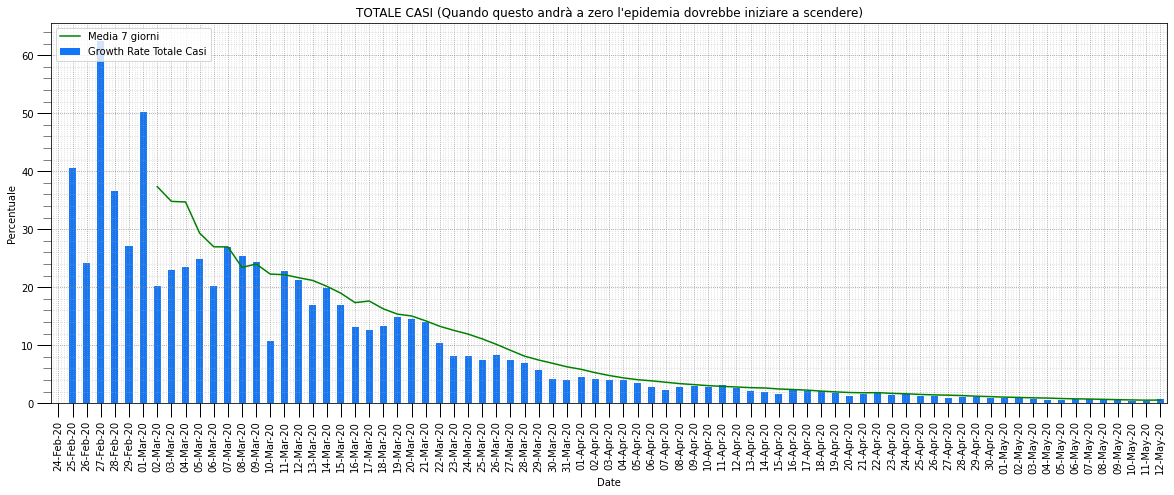

In [26]:
fig, ax = plt.subplots()
ay = avg_trend.plot(kind='line', x='data', y=['avg_totale'], color=[COL_AVG], rot=90, label=['Media 7 giorni'], ax=ax)
#plt.plot(inter[0], inter[1], color='tomato', label='Predizione') 
avg_trend.plot(kind='bar', x='data', y=['totale_casi_percent'], color=[COL_TOTALE_CASI], label=['Growth Rate Totale Casi'], ax=ay)

ax.set_title("TOTALE CASI (Quando questo andrà a zero l'epidemia dovrebbe iniziare a scendere)")
ax.set_ylabel('Percentuale')
beautify_graph(ax)

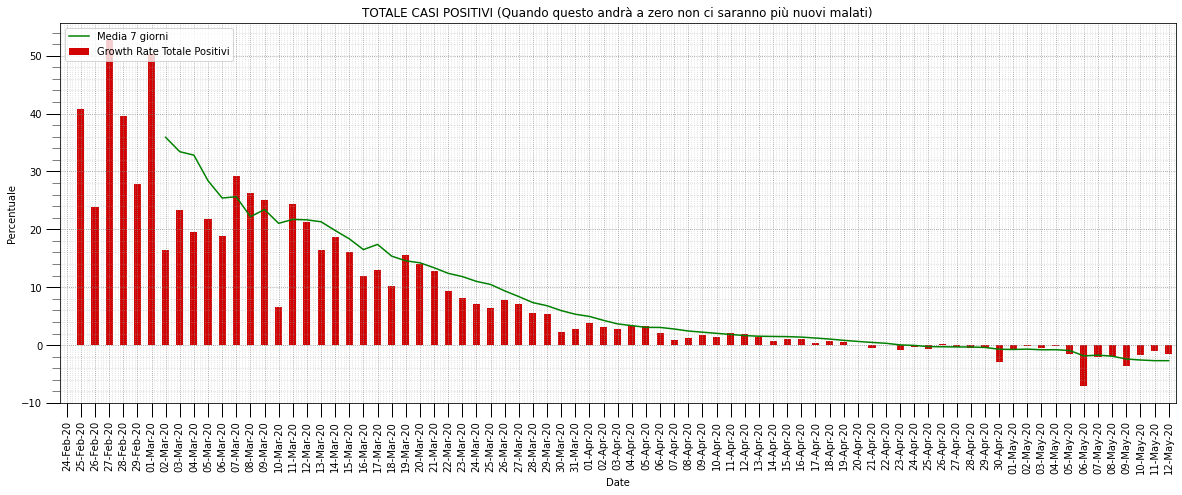

In [27]:
fig, ax = plt.subplots()

#ax.bar(x, series+fill, color=[COL_ATTUALMENTE_POSITIVI], label='Growth Rate Totale Positivi')
ay = avg_trend.plot(kind='line', x='data', y=['avg_att_positivi'], color=[COL_AVG], rot=90, label=['Media 7 giorni'], ax=ax)
#plt.plot(inter[0], inter[1], color='tomato', label='Predizione') 
avg_trend.plot(kind="bar", x='data', y=['attualmente_positivi_percent'], color=[COL_ATTUALMENTE_POSITIVI], label=['Growth Rate Totale Positivi'], ax=ay)

ax.set_title("TOTALE CASI POSITIVI (Quando questo andrà a zero non ci saranno più nuovi malati)")
ax.set_ylabel('Percentuale')

beautify_graph(ax)


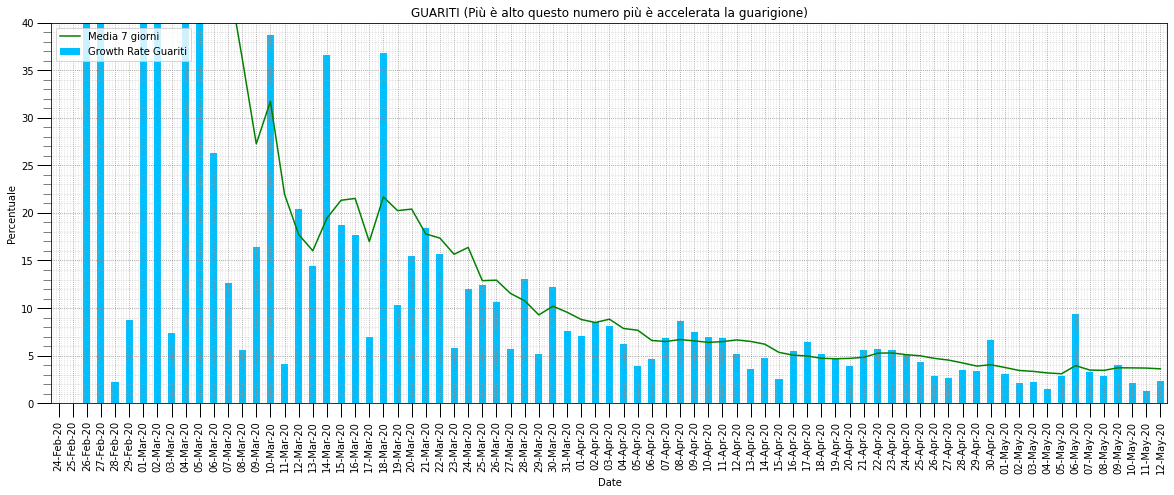

In [28]:
fig, ax = plt.subplots()
plot = ['dimessi_guariti_percent']

labels = ['Growth Rate Guariti']
ay = avg_trend.plot(kind='bar', x='data', y=plot, color=[COL_GUARITI], rot=90, label=labels, ax=ax)

plot = ['avg_dimessi_guariti']
labels = ['Media 7 giorni']
ay = avg_trend.plot(kind='line', x='data', y=plot, color=[COL_AVG], rot=90, label=labels, ax=ax)

ax.set_title("GUARITI (Più è alto questo numero più è accelerata la guarigione)")
ax.set_ylabel('Percentuale')
ax.set_ylim(0,40)
beautify_graph(ax)

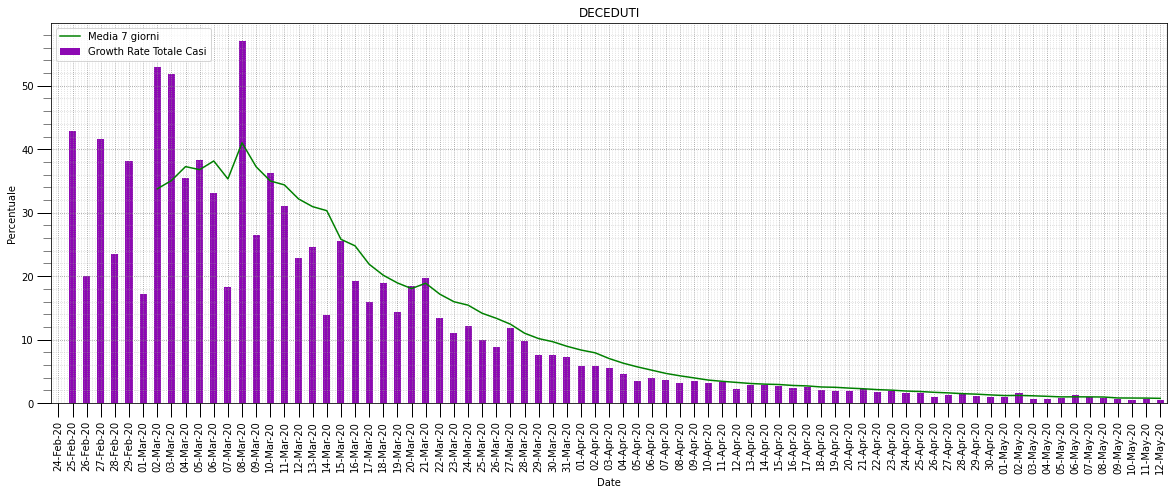

In [29]:
fig, ax = plt.subplots()

ay = avg_trend.plot(kind='line', x='data', y=['avg_deceduti'], color=[COL_AVG], rot=90, label=['Media 7 giorni'], ax=ax)
avg_trend.plot(kind='bar', x='data', y=['deceduti_percent'], color=[COL_DECEDUTI], label=['Growth Rate Totale Casi'], ax=ay)

ax.set_title("DECEDUTI")
ax.set_ylabel('Percentuale')
beautify_graph(ax)

## Velocità epidemia (Growth Factor)

Calcolo della derivata. La derivata ci dà l'idea della velocità e della direzione della curva epidemica. Se il valore è uguale a 1 la crescita è lineare (ogni giorno cresce dello stesso numero di persone è come andare a una velocità fissa di 50KM orari). Un fattore maggiore di 1 indica che la crescita aumenta la sua velocità (l'epidemia schiaccia sull'acceleratore), un valore inferiore a 1 indica l'epidemia rallenta la sua velocità (l'epidemaia ha schiacciato il freno). Una fattore uguale a zero significa che è stabile. 

In [30]:
max_tamponi = incremental_data['tamponi'].max()


In [31]:
gf = pd.DataFrame()
gf['data'] = national_trend['data']
gf['totale_casi'] = national_trend['totale_casi']
gf['diff'] = gf['totale_casi'] - gf['totale_casi'].shift(1)
gf['gr'] = ((gf['diff'] / abs(gf['diff'].shift(1)))).round(3)
gf['avg_gf'] = gf['gr'].rolling(7).mean().round(3)
gf['avg_gf_15'] = gf['gr'].rolling(15).mean().round(3)


gf['tamponi'] =national_trend['tamponi']
gf['diff_tamp'] =national_trend['tamponi']-national_trend['tamponi'].shift(1)
gf['totale_casi'].shift(1) * max_tamponi /(national_trend['tamponi'].shift(1) -national_trend['tamponi'].shift(2))
gf['gr_tamp'] = ((gf['diff_tamp'] / abs(gf['diff_tamp'].shift(1)))).round(3)
gf['avg_gf_tamp'] = gf['gr_tamp'].rolling(7).mean().round(3)
gf['avg_gf_tamp_15'] = gf['gr_tamp'].rolling(15).mean().round(3)

gf['totale_attualmente_positivi'] = national_trend['totale_attualmente_positivi']
gf['diff_att_pos'] = gf['totale_attualmente_positivi'] - gf['totale_attualmente_positivi'].shift(1)

gf['gr_att_pos'] = ((gf['diff_att_pos'] / abs(gf['diff_att_pos'].shift(1)))).round(3)
gf['avg_att_pos'] = gf['gr_att_pos'].rolling(7).mean().round(3)
gf['avg_att_pos_15'] = gf['gr_att_pos'].rolling(15).mean().round(3)


show_table(gf, 7)\
    .drop('diff', axis=1)\
    .drop('diff_tamp', axis=1)\
    .rename(columns=
       {'gr': 'GROWTH FACTOR NUOVI', 
        'avg_gf': 'MEDIA 7GG',
        'avg_gf_3': 'MEDIA 3GG',
        'avg_gf_15': 'MEDIA 15GG',
        'gr_att_pos': 'GROWTH FACTOR ATT. POS.',
        'avg_att_pos_3': 'MEDIA 3GG',
        'avg_att_pos': 'MEDIA 7GG',
        'avg_att_pos_15': 'MEDIA 15GG',
        'gr_tamp': 'GROWTH FACTOR TAMPONI',
        'avg_gf_tamp_15': 'MEDIA 15GG',
        'avg_gf_tamp': 'MEDIA 7GG'
       })


CASI TOTALI  GROWTH FACTOR NUOVI  MEDIA 7GG  MEDIA 15GG  TAMPONI  \
                                                                              
06-May-20       214457                1.343      0.964       0.975  2310929   
07-May-20       215858                0.970      0.974       0.957  2381288   
08-May-20       217185                0.947      0.960       0.968  2445063   
09-May-20       218268                0.816      0.938       0.946  2514234   
10-May-20       219070                0.741      0.939       0.944  2565912   
11-May-20       219814                0.928      0.946       0.940  2606652   
12-May-20       221216                1.884      1.090       1.016  2673655   

           GROWTH FACTOR TAMPONI  MEDIA 7GG  MEDIA 15GG  TOT. POSITIVI  \
                                                                         
06-May-20                  1.163      1.026       1.050          91528   
07-May-20                  1.095      1.029       1.042          89624   
08-May-20                  0.906      1.004       1.032          87961   
09-May-20                  1.085      1.052       1.042          84842   
10-May-20                  0.747      1.043       1.022          83324   
11-May-20                  0.788      1.036       1.023          82488   
12-May-20                  1.645      1.061       1.090          81266   

           diff_att_pos  GROWTH FACTOR ATT. POS.  MEDIA 7GG  MEDIA 15GG  
                                                                         
06-May-20       -6939.0                   -4.586     -3.003      -7.493  
07-May-20       -1904.0                   -0.274     -2.233      -7.510  
08-May-20       -1663.0                   -0.873     -2.329      -1.895  
09-May-20       -3119.0                   -1.876     -2.541      -1.995  
10-May-20       -1518.0                   -0.487     -2.297      -1.886  
11-May-20        -836.0                   -0.551     -2.321      -1.948  
12-May-20       -1222.0                   -1.462     -1.444      -1.970

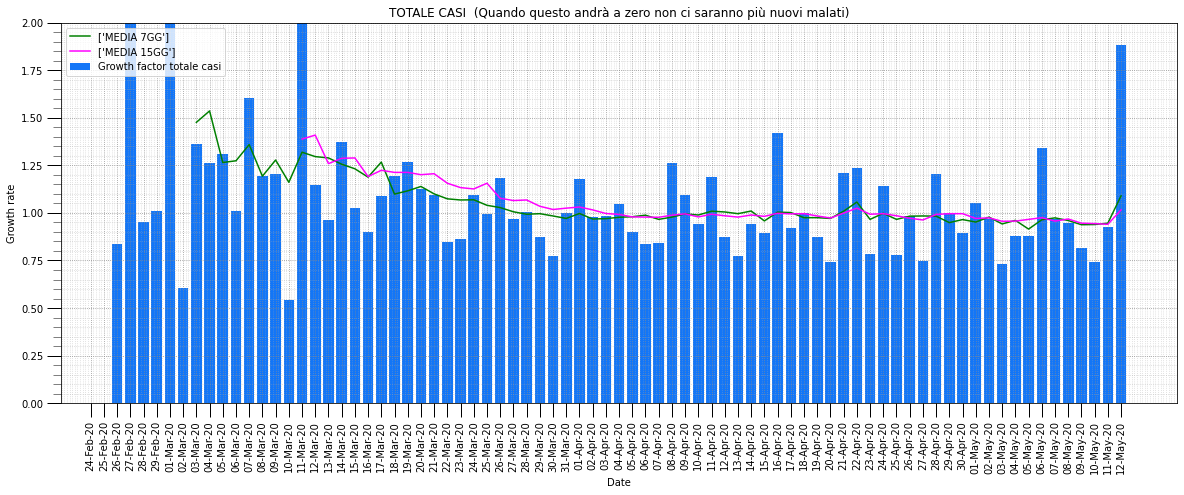

In [32]:
plt.rcParams['figure.figsize'] = [20, 7]
fig, ax = plt.subplots()

ax.bar(gf['data'], gf['gr'], label='Growth factor totale casi', color=COL_TOTALE_CASI)
ax.plot(gf['data'], gf['avg_gf'], color=COL_AVG, label=['MEDIA 7GG'])
ax.plot(gf['data'], gf['avg_gf_15'], color='magenta', label=['MEDIA 15GG'])
ax.set_xticklabels(gf['data'], rotation=90)
ax.set_ylim(0,2)
ax.set_title("TOTALE CASI  (Quando questo andrà a zero non ci saranno più nuovi malati)")
ax.set_ylabel('Growth rate')
beautify_graph(ax)


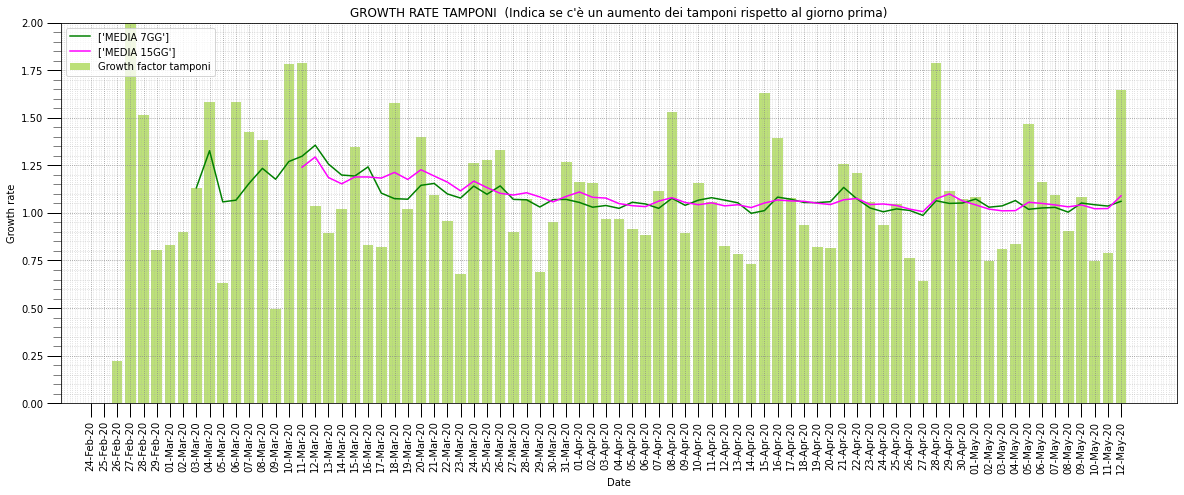

In [33]:
fig, ax = plt.subplots()

ax.bar(gf['data'], gf['gr_tamp'], label='Growth factor tamponi', color=COL_TAMPONI)
ax.plot(gf['data'], gf['avg_gf_tamp'], color=COL_AVG, label=['MEDIA 7GG'])
ax.plot(gf['data'], gf['avg_gf_tamp_15'], color='magenta', label=['MEDIA 15GG'])
ax.set_xticklabels(gf['data'], rotation=90)
ax.set_ylim(0,2)
ax.set_title("GROWTH RATE TAMPONI  (Indica se c'è un aumento dei tamponi rispetto al giorno prima)")
ax.set_ylabel('Growth rate')
beautify_graph(ax)


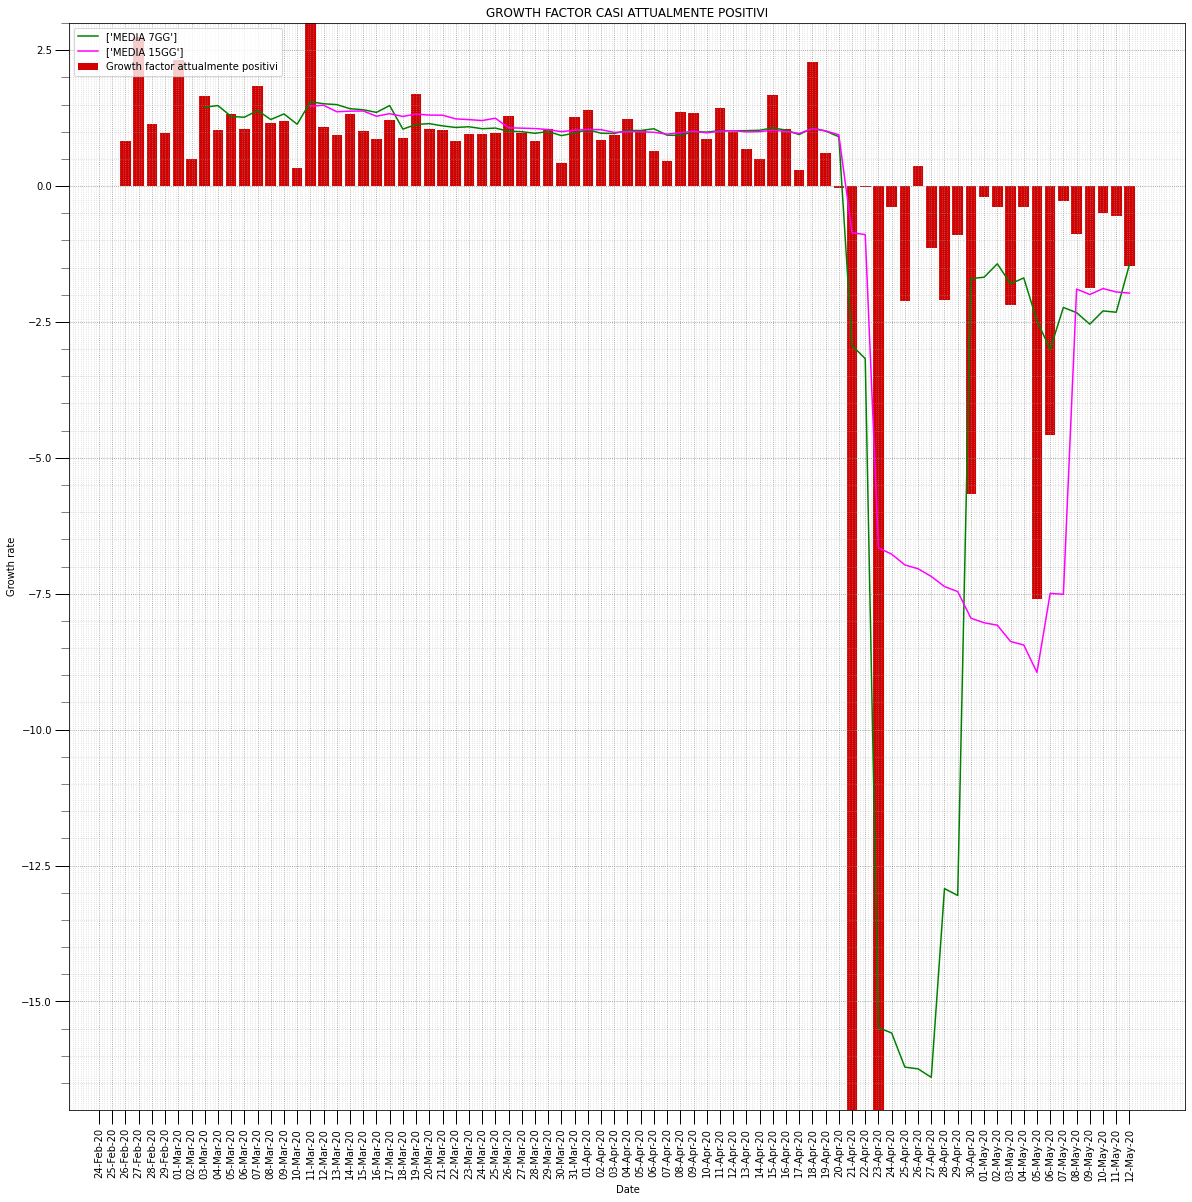

In [34]:
plt.rcParams['figure.figsize'] = [20, 20]
fig, ax = plt.subplots()


ax.bar(gf['data'], gf['gr_att_pos'], label='Growth factor attualmente positivi', color=COL_ATTUALMENTE_POSITIVI)
ax.plot(gf['data'], gf['avg_att_pos'], color=COL_AVG,label=['MEDIA 7GG'])
ax.plot(gf['data'], gf['avg_att_pos_15'], color='magenta',label=['MEDIA 15GG'])
ax.set_xticklabels(gf['data'], rotation=90)
ax.set_ylim(-17,3)
ax.set_title("GROWTH FACTOR CASI ATTUALMENTE POSITIVI")
ax.set_ylabel('Growth rate')
beautify_graph(ax)

In [35]:
plt.rcParams['figure.figsize'] = [20, 7]

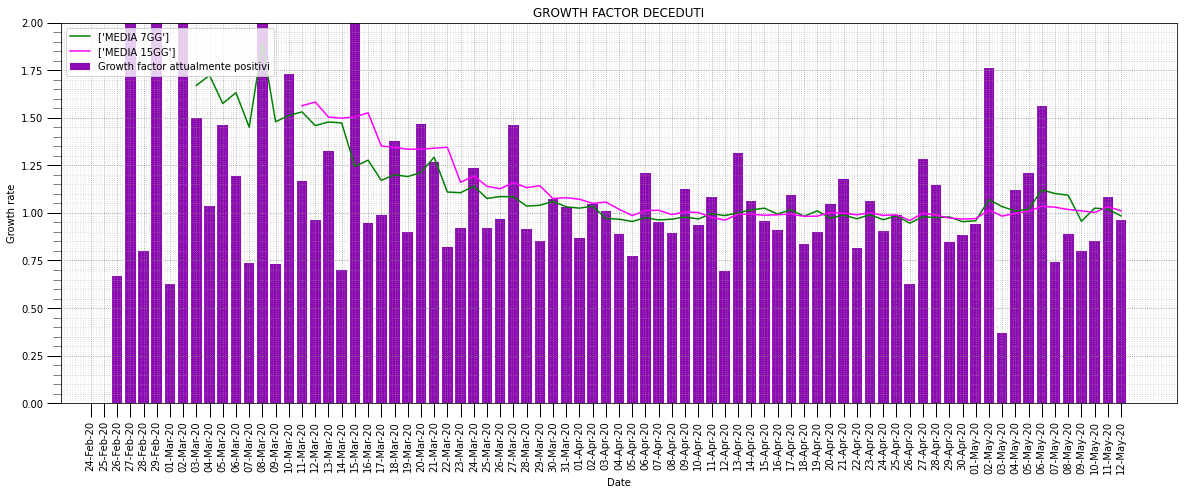

In [36]:
gf = pd.DataFrame()
gf['data'] = national_trend['data']
gf['deceduti'] = national_trend['deceduti']
gf['diff'] = gf['deceduti'] - gf['deceduti'].shift(1)
gf['gr'] = (gf['diff'] / gf['diff'].shift(1)).round(3)
gf['avg_gf'] = gf['gr'].rolling(7).mean().round(3)
gf['avg_gf15'] = gf['gr'].rolling(15).mean().round(3)

fig, ax = plt.subplots()

ax.bar(gf['data'], gf['gr'], label='Growth factor attualmente positivi', color=COL_DECEDUTI)
ax.plot(gf['data'], gf['avg_gf'], color=COL_AVG,label=['MEDIA 7GG'])
ax.plot(gf['data'], gf['avg_gf15'], color='magenta',label=['MEDIA 15GG'])
ax.set_xticklabels(gf['data'], rotation=90)
ax.set_ylim(0,2)
ax.set_title("GROWTH FACTOR DECEDUTI")
ax.set_ylabel('Growth rate')
beautify_graph(ax)


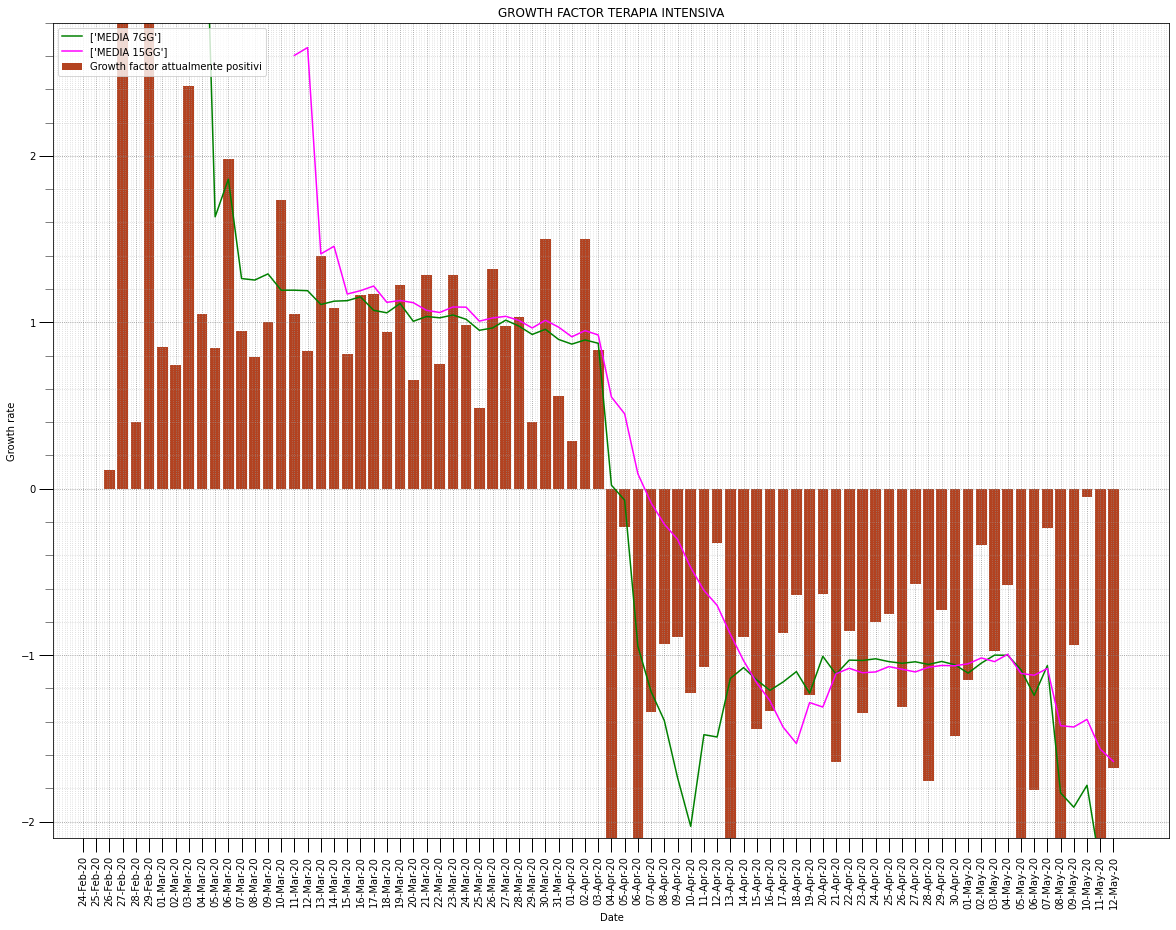

In [37]:
gf = pd.DataFrame()
gf['data'] = national_trend['data']
gf['terapia_intensiva'] = national_trend['terapia_intensiva']
gf['diff'] = gf['terapia_intensiva'] - gf['terapia_intensiva'].shift(1)
gf['gr'] = (gf['diff'] / abs(gf['diff'].shift(1))).round(3)
gf['avg_gf'] = gf['gr'].rolling(7).mean().round(3)
gf['avg_gf15'] = gf['gr'].rolling(15).mean().round(3)

plt.rcParams['figure.figsize'] = [20, 15]
fig, ax = plt.subplots()


ax.bar(gf['data'], gf['gr'], label='Growth factor attualmente positivi', color=COL_TERAPIA_INTENSIVA)
ax.plot(gf['data'], gf['avg_gf'], color=COL_AVG,label=['MEDIA 7GG'])
ax.plot(gf['data'], gf['avg_gf15'], color='magenta',label=['MEDIA 15GG'])
ax.set_xticklabels(gf['data'], rotation=90)
ax.set_ylim(-2.1,2.8)
ax.set_title("GROWTH FACTOR TERAPIA INTENSIVA")
ax.set_ylabel('Growth rate')
beautify_graph(ax)
plt.rcParams['figure.figsize'] = [20, 7]

### Divisione percentuali dei casi
Un indicazione percentuale dei dati. La fotografia ad oggi (dall'inizio dell'epidemia italiana)

**Le percentuali giornaliere (dati giorno per giorno)**

In [38]:
percents_in_period = pd.DataFrame()
percents_in_period['data'] = incremental_data['data']
percents_in_period['ricoverati_con_sintomi'] = (incremental_data['ricoverati_con_sintomi'] / incremental_data['totale_casi'])*100
percents_in_period['terapia_intensiva'] = (incremental_data['terapia_intensiva'] / incremental_data['totale_casi'])*100
percents_in_period['isolamento_domiciliare'] = (incremental_data['isolamento_domiciliare'] / incremental_data['totale_casi'])*100
percents_in_period['dimessi_guariti'] = (incremental_data['dimessi_guariti'] / incremental_data['totale_casi'])*100
percents_in_period['deceduti'] = (incremental_data['deceduti'] / incremental_data['totale_casi'])*100
percents_in_period['contagi'] = growth_rates['nuovi_attualmente_positivi']
percents_in_period = percents_in_period[1:].round(2)

In [39]:
percents_in_period.tail(7).drop('data', axis=1).drop('contagi', axis=1).rename(
    columns={
        'ricoverati_con_sintomi':'RICOVERATI',
        'terapia_intensiva':'TER. INTENSIVA',
        'isolamento_domiciliare':'ISOLAMENTO DOMICILIARE',
        'dimessi_guariti':'GUARITI',
        'deceduti':'DECEDUTI'
    }
)

RICOVERATI  TER. INTENSIVA  ISOLAMENTO DOMICILIARE  GUARITI  \
                                                                         
06-May-20      -34.70           -6.51                 -439.34   554.99   
07-May-20      -42.47           -1.57                  -91.86   216.35   
08-May-20      -40.54          -10.78                  -74.00   207.01   
09-May-20      -74.05          -12.37                 -201.57   370.08   
10-May-20      -26.93           -0.87                 -161.47   268.70   
11-May-20      -10.62           -3.76                  -97.98   188.31   
12-May-20      -48.07           -3.35                  -35.73   174.89   

           DECEDUTI  
                     
06-May-20     25.55  
07-May-20     19.56  
08-May-20     18.31  
09-May-20     17.91  
10-May-20     20.57  
11-May-20     24.06  
12-May-20     12.27

### Percentuali totali

In [40]:
percents_in_period.tail(10)

data  ricoverati_con_sintomi  terapia_intensiva  \
                                                                  
03-May-20  03-May-20                   -8.28              -2.74   
04-May-20  04-May-20                  -34.32              -1.80   
05-May-20  05-May-20                  -51.44              -4.84   
06-May-20  06-May-20                  -34.70              -6.51   
07-May-20  07-May-20                  -42.47              -1.57   
08-May-20  08-May-20                  -40.54             -10.78   
09-May-20  09-May-20                  -74.05             -12.37   
10-May-20  10-May-20                  -26.93              -0.87   
11-May-20  11-May-20                  -10.62              -3.76   
12-May-20  12-May-20                  -48.07              -3.35   

           isolamento_domiciliare  dimessi_guariti  deceduti  contagi  
                                                                       
03-May-20                  -26.78           125.27     12.53  -119.67  
04-May-20                   19.82           100.33     15.97    62.10  
05-May-20                  -84.47           218.79     21.95  -660.30  
06-May-20                 -439.34           554.99     25.55  -358.63  
07-May-20                  -91.86           216.35     19.56    72.56  
08-May-20                  -74.00           207.01     18.31    12.66  
09-May-20                 -201.57           370.08     17.91   -87.55  
10-May-20                 -161.47           268.70     20.57    51.33  
11-May-20                  -97.98           188.31     24.06    44.93  
12-May-20                  -35.73           174.89     12.27   -46.17

In [41]:
a="""plt.rcParams['figure.figsize'] = [20, 5]
fig, ax = plt.subplots()

plot = ['isolamento_domiciliare','dimessi_guariti','deceduti','ricoverati_con_sintomi','terapia_intensiva']
colors = [COL_ISOLAMENTO_DOMICILIARE, COL_GUARITI, COL_DECEDUTI,COL_RICOVERATI, COL_TERAPIA_INTENSIVA ]
labels = ['Isolamento Domiciliare','Guariti','Deceduti','Ricoverati con sintomi','Terapia Intensiva']

for i in range(len(plot)):
    plt.bar(percents_in_period['data'], percents_in_period[plot[i]], color=colors[i],label=labels[i])

ax.set_ylim(-20,100)
ax.set_xticklabels(gf['data'], rotation=90)
ax.set_title("PERCENTUALE GIORNALIERA")
ax.set_ylabel('Percentuale')
beautify_graph(ax)
"""

**Le percentuali dall'inizio dell'epidemia**

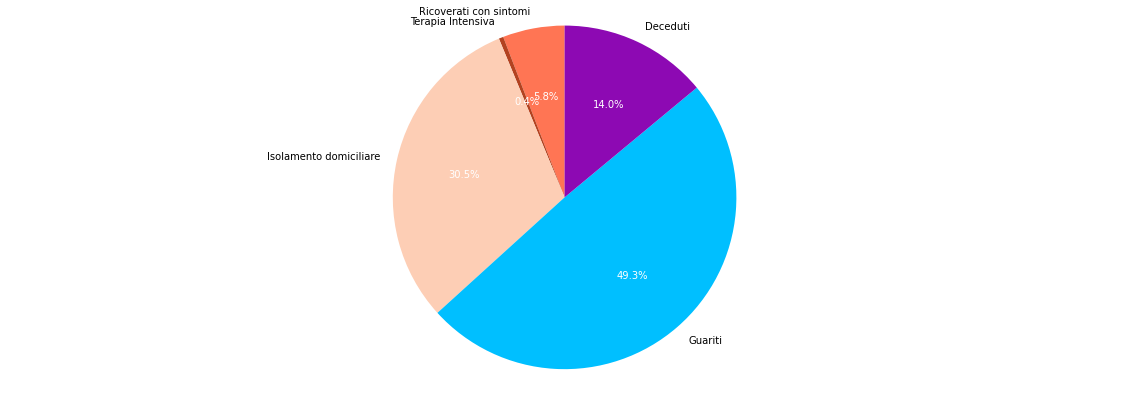

In [42]:
# Data to plot
last_info = national_trend[-1:]
v1 = int(last_info['ricoverati_con_sintomi'])
v2 = int(last_info['terapia_intensiva'])
v3 = int(last_info['isolamento_domiciliare'])
v4 = int(last_info['dimessi_guariti'])
v5 = int(last_info['deceduti'])
labels = 'Ricoverati con sintomi', 'Terapia Intensiva', 'Isolamento domiciliare', 'Guariti', 'Deceduti'
sizes = [v1, v2, v3, v4, v5]
fig1, ax1 = plt.subplots()
colors = [COL_RICOVERATI, COL_TERAPIA_INTENSIVA, COL_ISOLAMENTO_DOMICILIARE, COL_GUARITI, COL_DECEDUTI]
_, _, autotexts = ax1.pie(sizes,labels=labels,colors=colors, autopct='%1.1f%%',  startangle=90)

for autotext in autotexts:
    autotext.set_color('white')
    
ax1.axis('equal')

plt.show()


In [43]:
percents_in_period = pd.DataFrame()
percents_in_period['data'] = national_trend['data']
percents_in_period['ricoverati_con_sintomi'] = (national_trend['ricoverati_con_sintomi'] / national_trend['totale_casi'])*100
percents_in_period['terapia_intensiva'] = (national_trend['terapia_intensiva'] / national_trend['totale_casi'])*100
percents_in_period['isolamento_domiciliare'] = (national_trend['isolamento_domiciliare'] / national_trend['totale_casi'])*100
percents_in_period['dimessi_guariti'] = (national_trend['dimessi_guariti'] / national_trend['totale_casi'])*100
percents_in_period['deceduti'] = (national_trend['deceduti'] / national_trend['totale_casi'])*100
percents_in_period['contagi'] = growth_rates['nuovi_attualmente_positivi']
percents_in_period = percents_in_period[1:].round(2)

Lo spaccato giorno per giorno percentuale. Da qui si evidenzia come si evolve l'andamento percencentuale dell'epidemia. In basso (in verde) il grafico del Growth Rate di ogni giorno rispetto al giorno precedente. Per capire come si evolvono le percentuali in base all'aumento o la diminuzione dei nuovi casi.

In [44]:
percents_in_period.tail(7).drop('data', axis=1).drop('contagi', axis=1).rename(
    columns={
        'ricoverati_con_sintomi':'RICOVERATI',
        'terapia_intensiva':'TER. INTENSIVA',
        'isolamento_domiciliare':'ISOLAMENTO DOMICILIARE',
        'dimessi_guariti':'GUARITI',
        'deceduti':'DECEDUTI'
    }
)

RICOVERATI  TER. INTENSIVA  ISOLAMENTO DOMICILIARE  GUARITI  \
                                                                         
06-May-20        7.35            0.62                   34.70    43.48   
07-May-20        7.03            0.61                   33.88    44.60   
08-May-20        6.74            0.54                   33.22    45.59   
09-May-20        6.34            0.47                   32.06    47.20   
10-May-20        6.22            0.47                   31.35    48.01   
11-May-20        6.16            0.45                   30.91    48.49   
12-May-20        5.82            0.43                   30.49    49.29   

           DECEDUTI  
                     
06-May-20     13.84  
07-May-20     13.88  
08-May-20     13.91  
09-May-20     13.93  
10-May-20     13.95  
11-May-20     13.98  
12-May-20     13.97

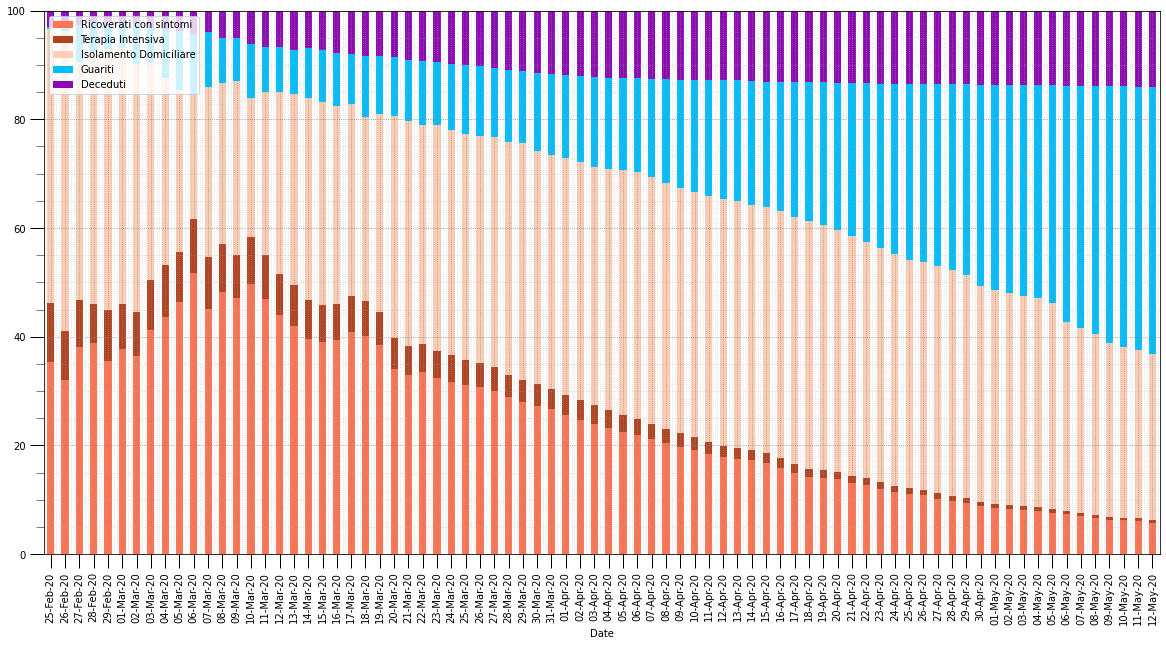

In [45]:
# %matplotlib notebook
plt.rcParams['figure.figsize'] = [20, 10]

plot = ['ricoverati_con_sintomi','terapia_intensiva','isolamento_domiciliare','dimessi_guariti','deceduti']
colors = [COL_RICOVERATI, COL_TERAPIA_INTENSIVA, COL_ISOLAMENTO_DOMICILIARE, COL_GUARITI, COL_DECEDUTI]
labels = ['Ricoverati con sintomi','Terapia Intensiva','Isolamento Domiciliare','Guariti','Deceduti']
ax = percents_in_period.plot(kind='bar', x='data', y=plot, color=colors, rot=90, label=labels, stacked=True)
ax.set_ylim(0,100)

beautify_graph(ax)


## DATI REGIONALI

In [46]:
regional_trend_read = pd.read_csv(os.path.join(REPO_DIR,'dati-regioni/dpc-covid19-ita-regioni.csv'))
regional_trend_read['totale_attualmente_positivi'] = regional_trend_read['totale_positivi']
regional_trend_read['nuovi_attualmente_positivi'] = regional_trend_read['variazione_totale_positivi']
regional_trend_read['DATA'] = pd.to_datetime(regional_trend_read['data']).dt.strftime('%d-%b-%y')
regional_trend_read['data'] = pd.to_datetime(regional_trend_read['data']).dt.strftime('%d-%b-%y')



In [47]:
#regional_trend.set_index(keys=['DATA'], append=False, inplace=True)
#regional_trend.index.rename('', inplace=True)


regions = regional_trend_read.denominazione_regione.unique()
regions_data = {}

for r in regions:
    data = regional_trend_read[regional_trend_read['denominazione_regione']==r]
    data.set_index(keys=['data'], append=False, inplace=True)
    regions_data[r]=data


In [48]:
#media_7_giorni =casi_tampone.rolling(7).mean().round(2)
region_colors = ['#505cf7','#e688b5','#e688b5','#791d9f','#17652e','#76f384',\
          '#bd3089','#5c4566','#3b6712','#bb90bf','#549bb5','#a674cc',\
          '#345a48','#dc9615','#51294a','#0446ca','#96bf9b','#c20cb2',\
          '#acc7fb','#ecdab7','#bbfc5f'
         ]


In [49]:
plot =['totale_casi','totale_attualmente_positivi','ricoverati_con_sintomi', 'terapia_intensiva','isolamento_domiciliare','dimessi_guariti','deceduti','nuovi_attualmente_positivi']

regional_datas = {x:pd.DataFrame() for x in plot}

for p in plot:
    for i,r in enumerate(regions):
        regional_datas[p][r]= regions_data[r][p]



### Totale Casi per Regione

In [50]:
regional_datas['totale_casi'].iloc[-1:,0:10]

Abruzzo  Basilicata  P.A. Bolzano  Calabria  Campania  \
data                                                               
12-May-20     3115         387          2572      1138      4615   

           Emilia-Romagna  Friuli Venezia Giulia  Lazio  Liguria  Lombardia  
data                                                                         
12-May-20           26929                   3148   7212     8863      82904

In [51]:
regional_datas['totale_casi'].iloc[-1:,10:]

Marche  Molise  Piemonte  Puglia  Sardegna  Sicilia  Toscana  \
data                                                                      
12-May-20    6568     386     28889    4337      1344     3343     9802   

           P.A. Trento  Umbria  Valle d'Aosta  Veneto  
data                                                   
12-May-20         4303    1419           1160   18782

### Nuovi Casi Per Regione

In [52]:
incremental_data_regional = pd.DataFrame()
incremental_columns = ['totale_casi','nuovi_attualmente_positivi', 'dimessi_guariti', 'deceduti','totale_ospedalizzati',  'ricoverati_con_sintomi', 'terapia_intensiva',  'isolamento_domiciliare', 'totale_attualmente_positivi','tamponi']

n = regional_datas['totale_casi']
for c in n.columns:
    incremental_data_regional[c] = n[c] - n[c].shift(1)
    incremental_data_regional[c] = incremental_data_regional[c].astype(pd.Int64Dtype())

incremental_data_regional = incremental_data_regional[1:]

In [53]:

incremental_data_regional.iloc[-7:,0:10]

Abruzzo  Basilicata  P.A. Bolzano  Calabria  Campania  \
data                                                               
06-May-20       22           3             1         3        14   
07-May-20       25         -16             9         3         9   
08-May-20        6          -1             6         1        21   
09-May-20        8           0             9         3        14   
10-May-20       17           3             2         3        12   
11-May-20        4           1             3         2        14   
12-May-20        8           1             0         4        13   

           Emilia-Romagna  Friuli Venezia Giulia  Lazio  Liguria  Lombardia  
data                                                                         
06-May-20             104                      9     81       76        764  
07-May-20             108                     13     39       94        720  
08-May-20             111                      9     52       78        634  
09-May-20             121                      8     47       15        502  
10-May-20              77                      6     32       50        282  
11-May-20              80                      8     25       44        364  
12-May-20              53                     10     22       31       1033

In [54]:

incremental_data_regional.iloc[-7:,10:]

Marche  Molise  Piemonte  Puglia  Sardegna  Sicilia  Toscana  \
data                                                                      
06-May-20      29       3       165      26         1       14       26   
07-May-20      31       1       196      49         5        7       26   
08-May-20      18      22       233      11         6       13       38   
09-May-20      23      20       181      30         4       12       24   
10-May-20      40      23       116      27         6       14       29   
11-May-20      10      13       111      14         3       12       13   
12-May-20      25       3       113      10         1        4       15   

           P.A. Trento  Umbria  Valle d'Aosta  Veneto  
data                                                   
06-May-20           19       4              3      77  
07-May-20            3       1              4      74  
08-May-20            2       1              1      65  
09-May-20            7       1              1      53  
10-May-20            3       4              5      51  
11-May-20            2       1              1      19  
12-May-20            6       7              2      41

### Totale Attualmente Positivi per Regione

In [55]:
regional_datas['totale_attualmente_positivi'].iloc[-1:,0:10]

Abruzzo  Basilicata  P.A. Bolzano  Calabria  Campania  \
data                                                               
12-May-20     1548         140           437       568      1877   

           Emilia-Romagna  Friuli Venezia Giulia  Lazio  Liguria  Lombardia  
data                                                                         
12-May-20            6801                    801   4273     2779      30675

In [56]:
regional_datas['totale_attualmente_positivi'].iloc[-1:,10:]

Marche  Molise  Piemonte  Puglia  Sardegna  Sicilia  Toscana  \
data                                                                      
12-May-20    3208     226     13184    2421       506     1911     3841   

           P.A. Trento  Umbria  Valle d'Aosta  Veneto  
data                                                   
12-May-20          667     109            104    5190

### Nuovi Positivi per Regione

In [57]:
regional_datas['nuovi_attualmente_positivi'].iloc[-7:,0:10]

Abruzzo  Basilicata  P.A. Bolzano  Calabria  Campania  \
data                                                               
06-May-20      -18          -5           -33        -6      -190   
07-May-20      -21         -17           -28       -11      -201   
08-May-20      -57          -3           -49       -14      -127   
09-May-20      -37          -7           -29        -7       -47   
10-May-20       -5          -2           -14       -16       -50   
11-May-20      -62          -1           -12       -28        -6   
12-May-20      -61          -2           -10         0       -32   

           Emilia-Romagna  Friuli Venezia Giulia  Lazio  Liguria  Lombardia  
data                                                                         
06-May-20            -290                    -22     63     -121      -5339  
07-May-20            -380                    -35    -85      -58        262  
08-May-20            -281                    -16    -20      -72        -32  
09-May-20            -329                    -42     17     -194      -1721  
10-May-20            -210                    -18    -59      -82        -72  
11-May-20            -151                    -21      8      -56        221  
12-May-20            -239                    -29    -21      -65        264

In [58]:
regional_datas['nuovi_attualmente_positivi'].iloc[-7:,10:]

Marche  Molise  Piemonte  Puglia  Sardegna  Sicilia  Toscana  \
data                                                                      
06-May-20      17       2      -465     -36       -19       -1     -102   
07-May-20      11      -9      -389    -103       -40      -74     -372   
08-May-20      -9      14      -362     -67       -30        0     -124   
09-May-20      -8      21      -173      -4        -3      -47     -144   
10-May-20      21      13      -284     -60       -35      -11     -301   
11-May-20     -24      11      -312    -125        -4       -7      -74   
12-May-20     -19      -3      -154    -123        -5     -151     -232   

           P.A. Trento  Umbria  Valle d'Aosta  Veneto  
data                                                   
06-May-20          -59      -5             17    -327  
07-May-20          -72     -30              3    -255  
08-May-20          -38     -22             -7    -347  
09-May-20          -42      -8             -5    -310  
10-May-20          -44       2             -5    -286  
11-May-20          -51      -5             -6    -131  
12-May-20          -68       1             -3    -270

### Terapia intensiva

In [59]:
regional_datas['terapia_intensiva'].iloc[-7:,:10]

Abruzzo  Basilicata  P.A. Bolzano  Calabria  Campania  \
data                                                               
06-May-20       11           3            11         3        25   
07-May-20       12           2            11         2        27   
08-May-20       10           2             9         2        28   
09-May-20       10           1             9         2        26   
10-May-20       10           1             8         2        20   
11-May-20        9           1             7         1        23   
12-May-20        8           1             7         1        20   

           Emilia-Romagna  Friuli Venezia Giulia  Lazio  Liguria  Lombardia  
data                                                                         
06-May-20             176                      3     91       59        480  
07-May-20             173                      2     89       57        480  
08-May-20             163                      2     84       46        400  
09-May-20             155                      3     82       42        330  
10-May-20             150                      3     84       41        348  
11-May-20             141                      3     83       38        341  
12-May-20             136                      2     84       35        322

In [60]:
regional_datas['terapia_intensiva'].iloc[-7:,10:]

Marche  Molise  Piemonte  Puglia  Sardegna  Sicilia  Toscana  \
data                                                                      
06-May-20      42       0       150      36        11       25       92   
07-May-20      41       0       150      35         9       21       91   
08-May-20      38       0       140      33        10       19       84   
09-May-20      32       0       143      33        11       17       79   
10-May-20      30       0       137      34        10       16       78   
11-May-20      28       0       135      32        10       16       77   
12-May-20      24       1       136      31        11       15       72   

           P.A. Trento  Umbria  Valle d'Aosta  Veneto  
data                                                   
06-May-20           13       9              3      90  
07-May-20           11       9              2      87  
08-May-20           11       6              2      79  
09-May-20           10       6              3      40  
10-May-20           10       6              2      37  
11-May-20           11       4              1      38  
12-May-20            9       4              0      33

## Andamento per regione

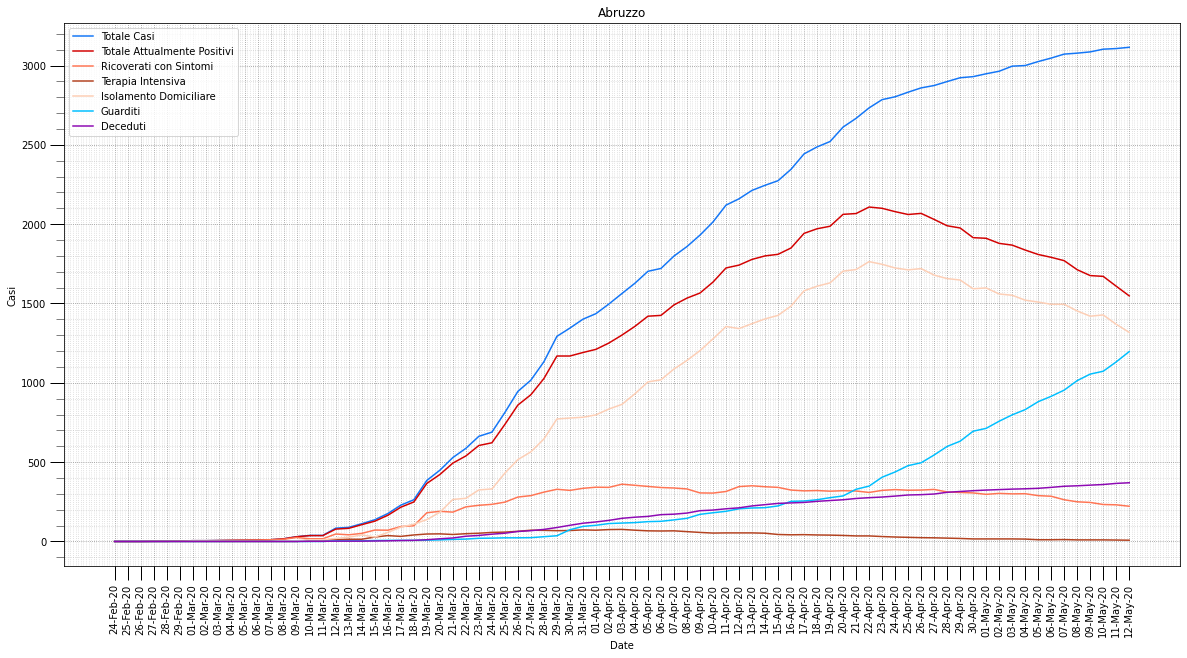

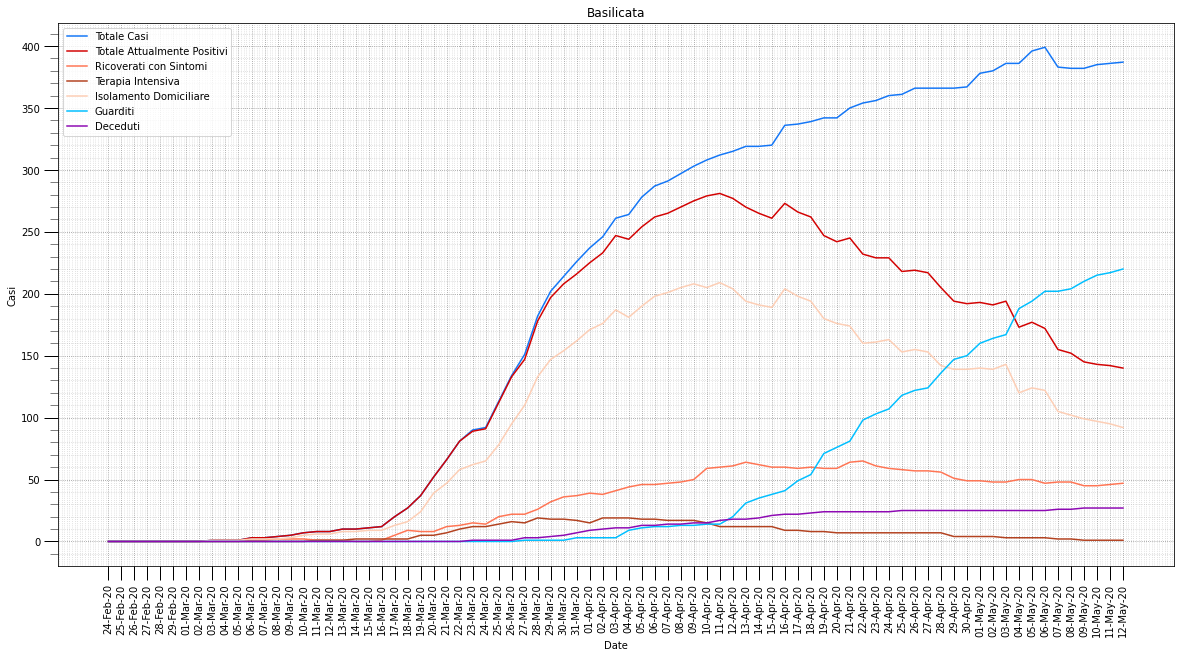

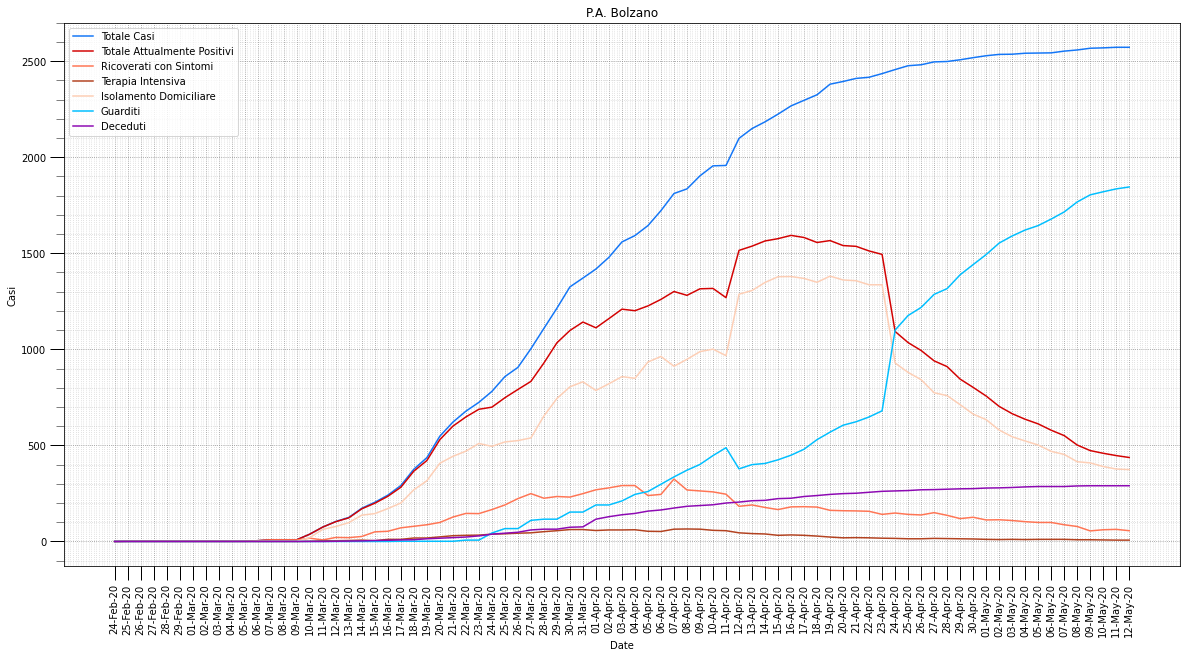

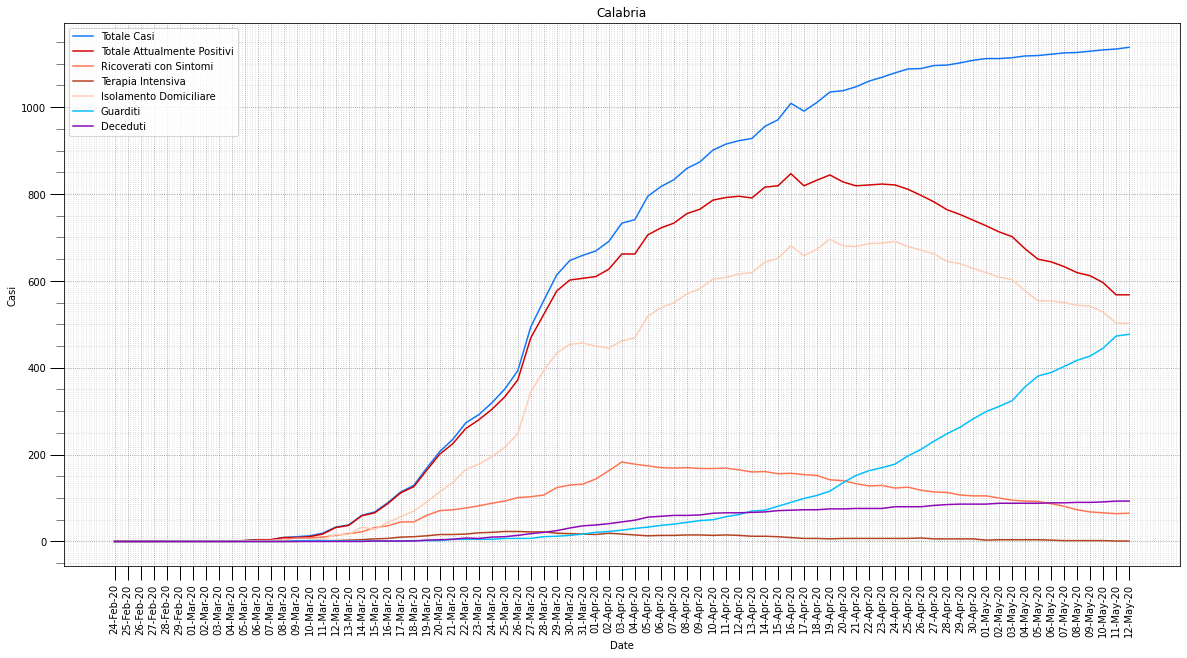

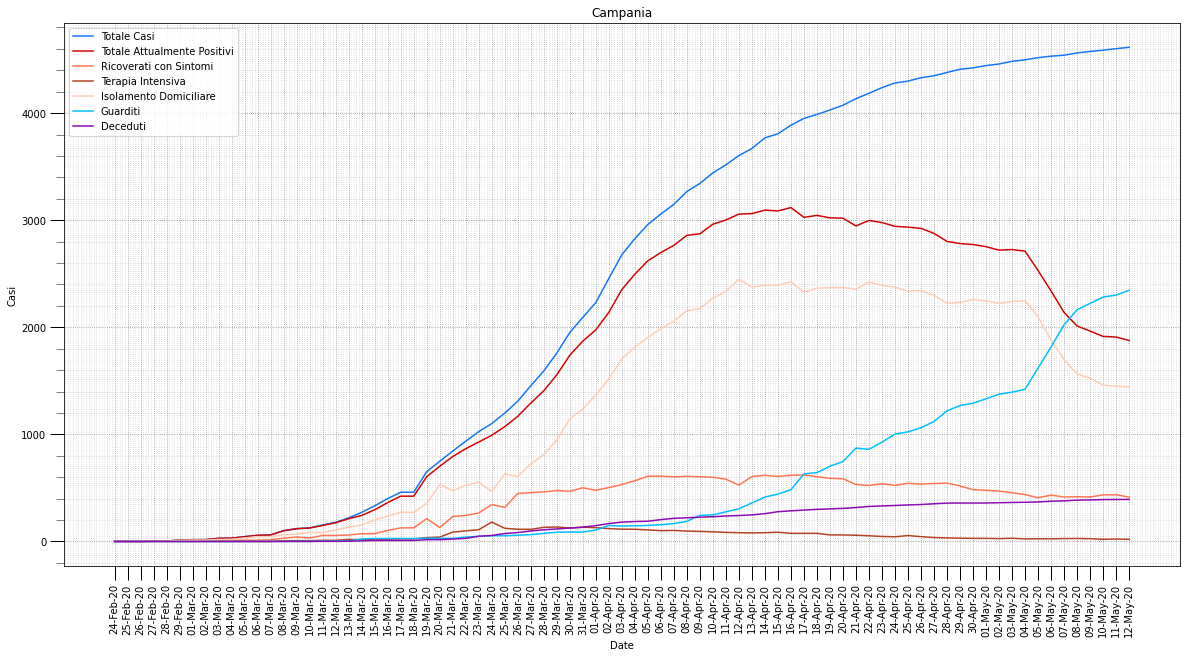

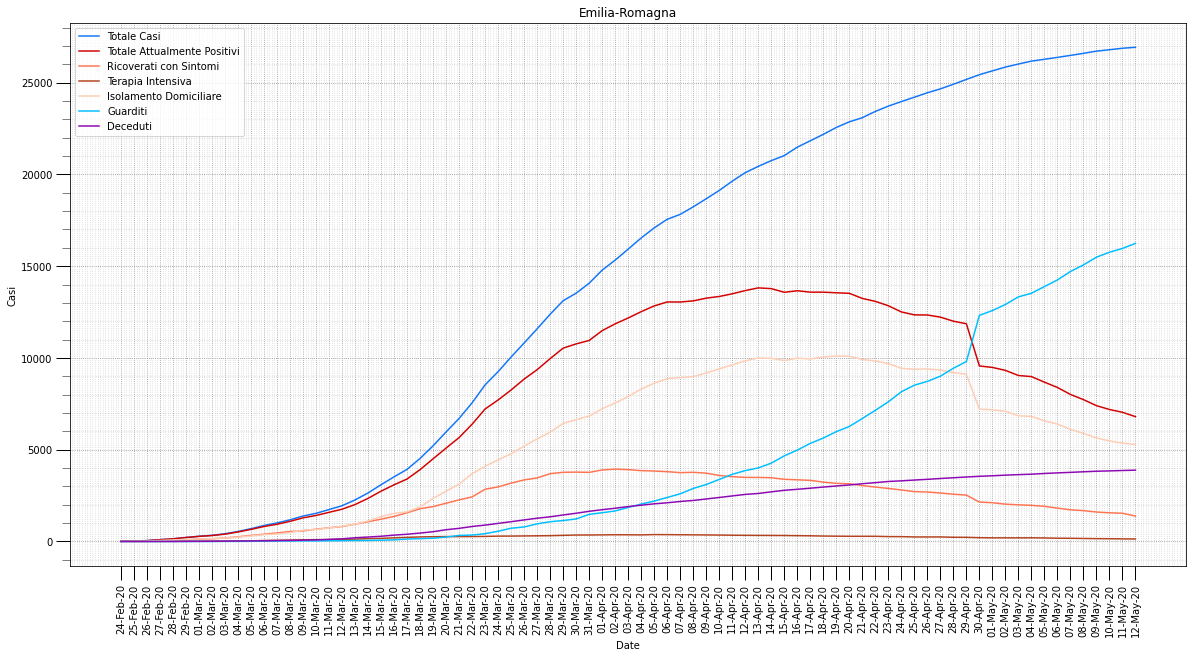

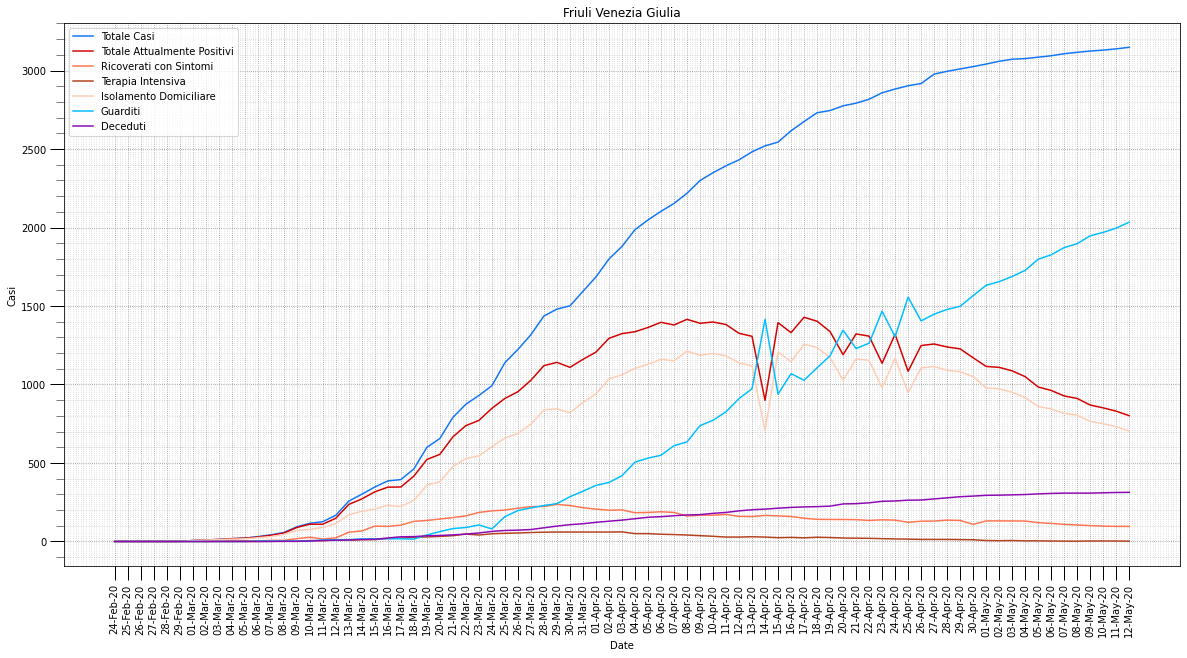

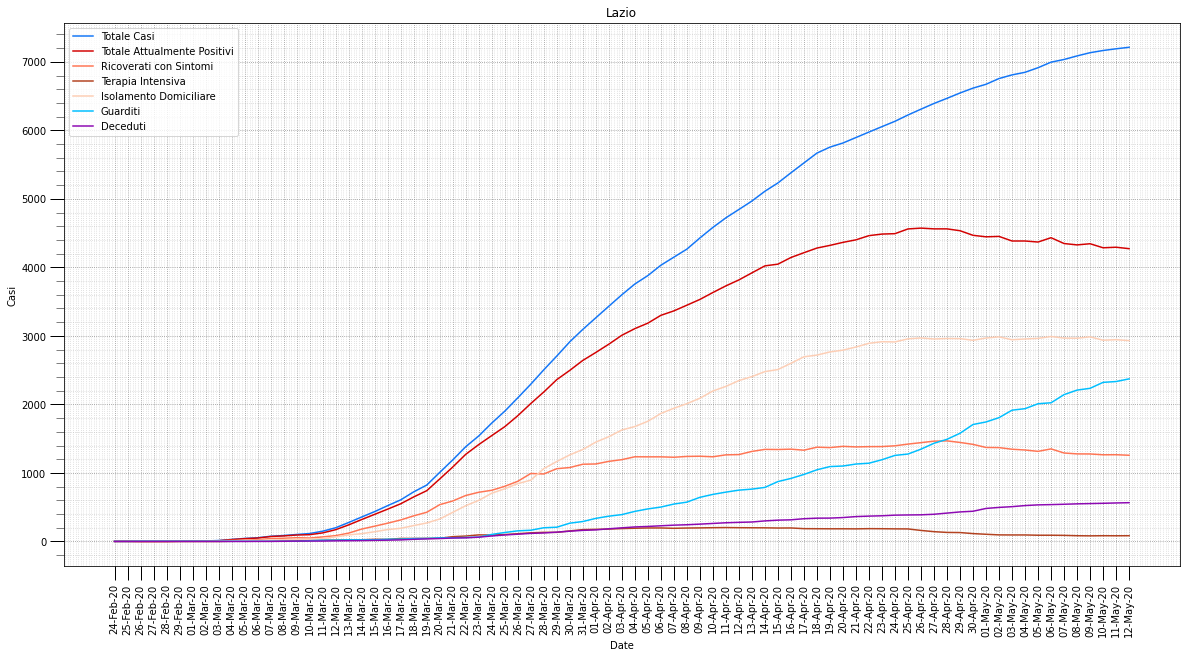

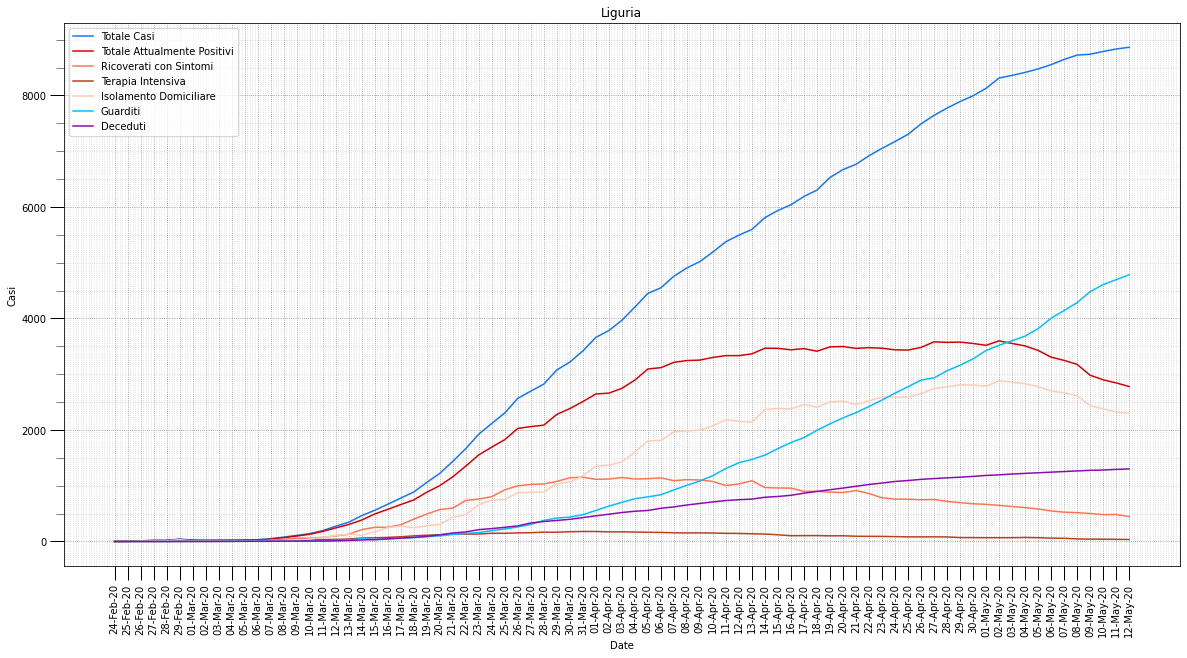

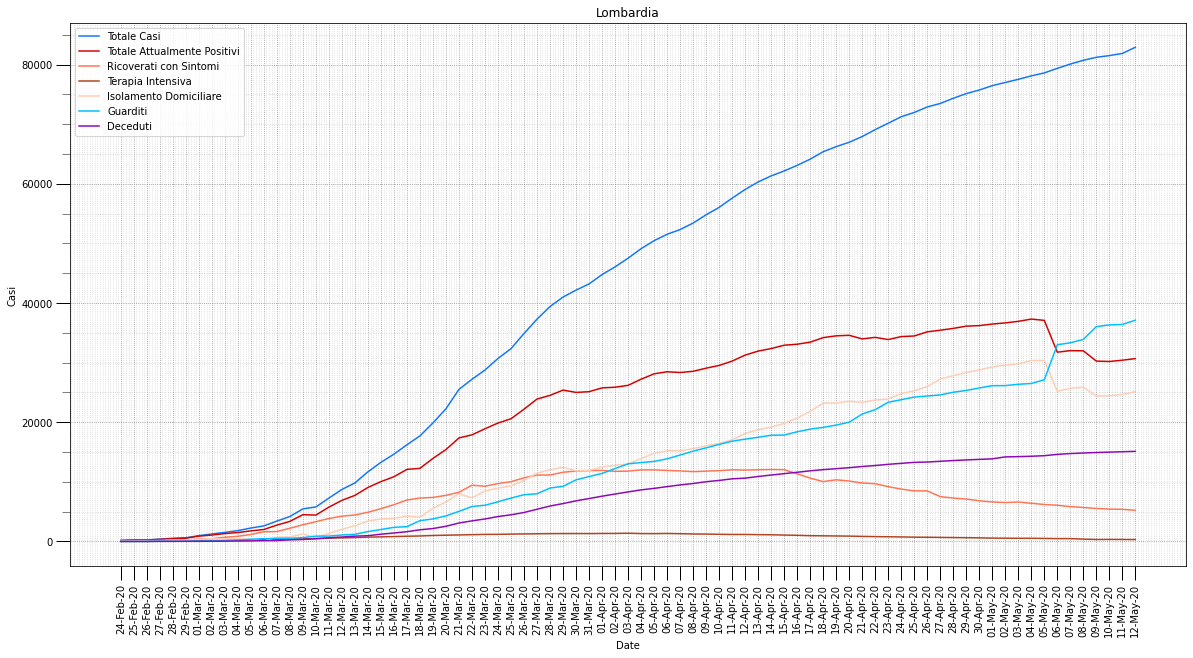

In [61]:

plot =['totale_casi','totale_attualmente_positivi','ricoverati_con_sintomi', 'terapia_intensiva','isolamento_domiciliare','dimessi_guariti','deceduti']
colors = [COL_TOTALE_CASI, COL_ATTUALMENTE_POSITIVI, COL_RICOVERATI, COL_TERAPIA_INTENSIVA, COL_ISOLAMENTO_DOMICILIARE, COL_GUARITI, COL_DECEDUTI]
legends = ["Totale Casi", "Totale Attualmente Positivi","Ricoverati con Sintomi","Terapia Intensiva","Isolamento Domiciliare","Guarditi", "Deceduti"]
for i,r in enumerate(regions[:10]):
    fig, ax = plt.subplots()
    for j,p in enumerate(plot):
        plt.plot(regions_data[r].index, regions_data[r][p], color=colors[j], label=legends[j])
    ax.set_title(r)
    ax.set_ylabel('Casi')
    ax.set_xticklabels(regions_data[r].index, rotation=90)    
    beautify_graph(ax)

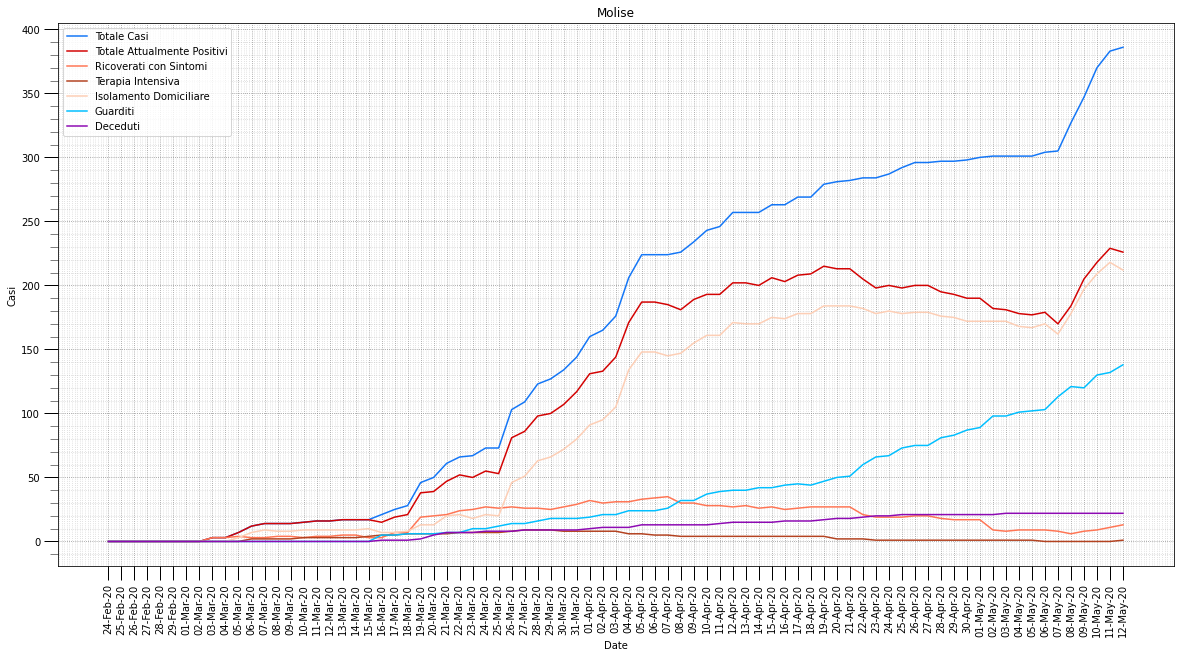

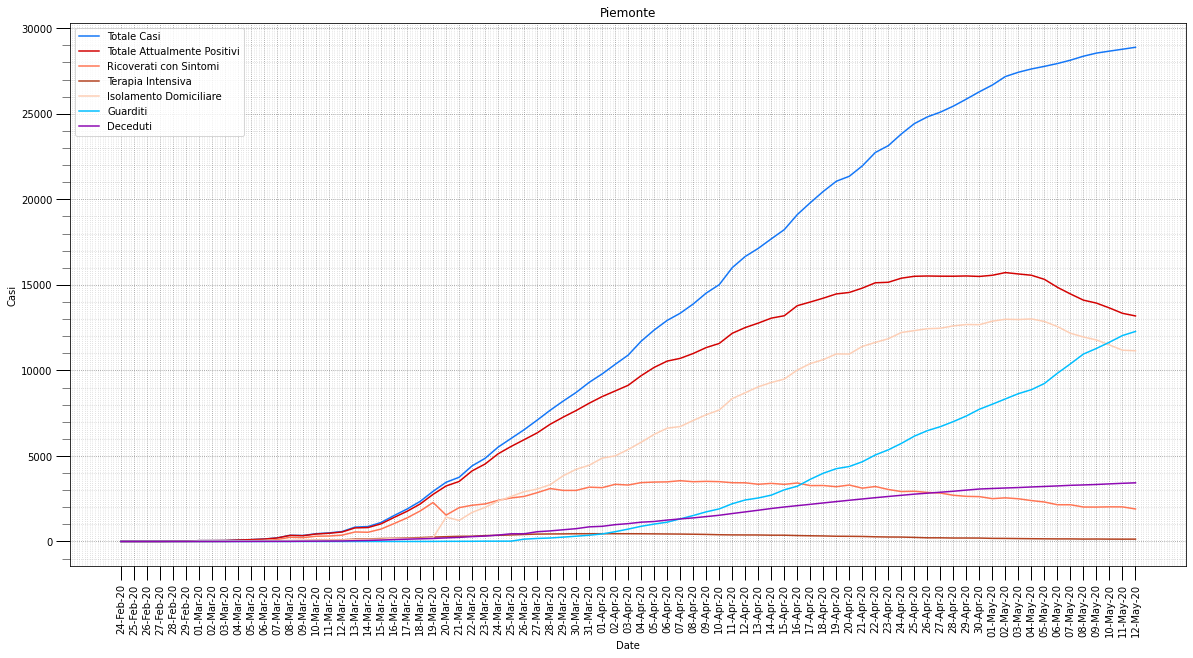

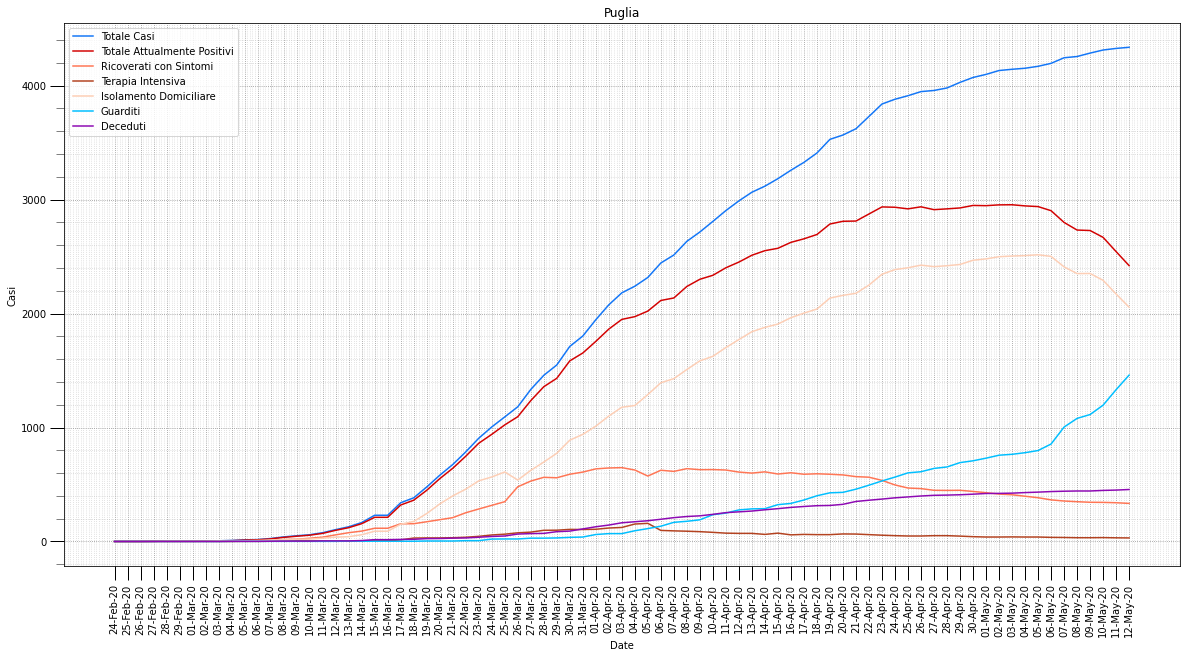

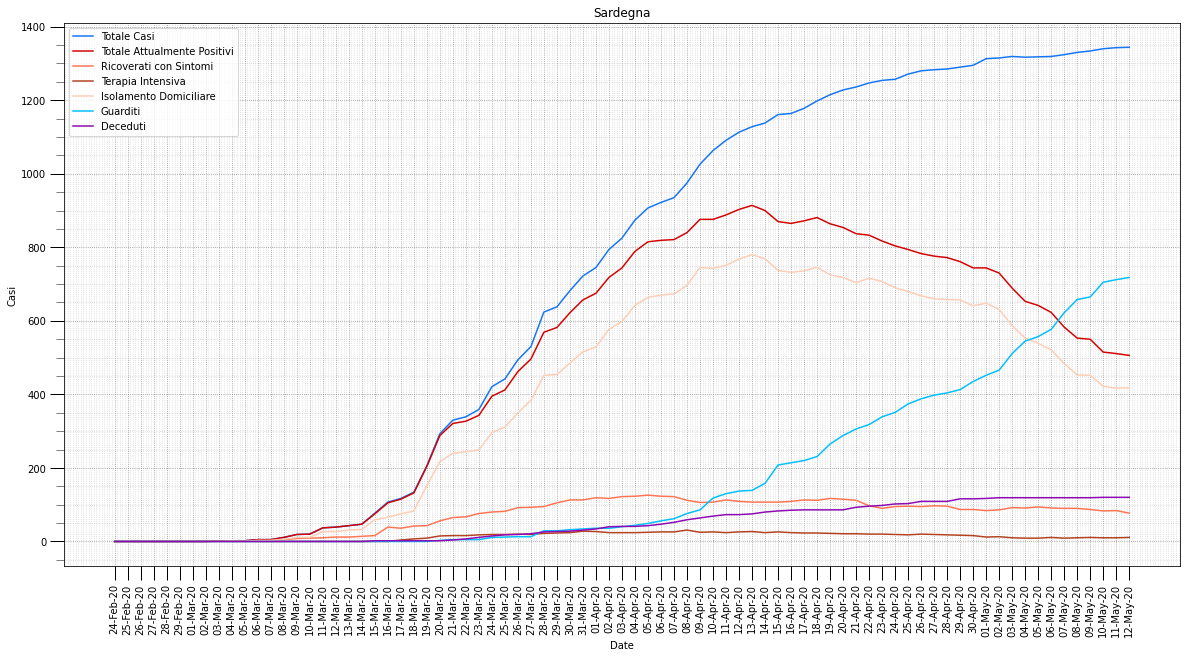

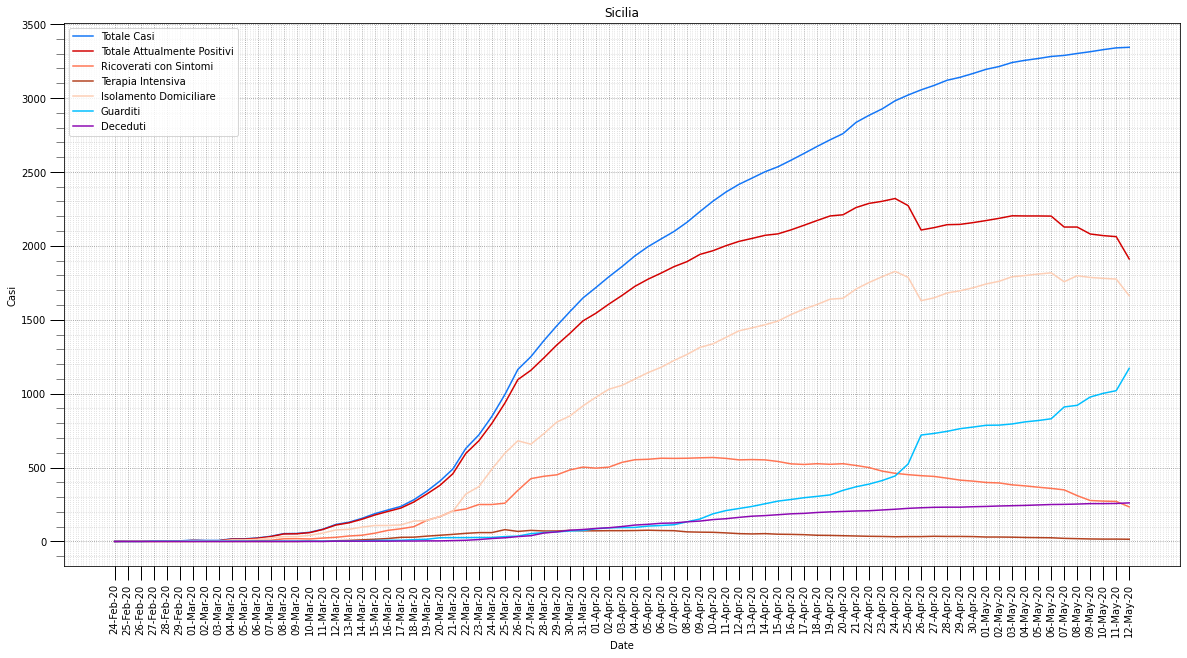

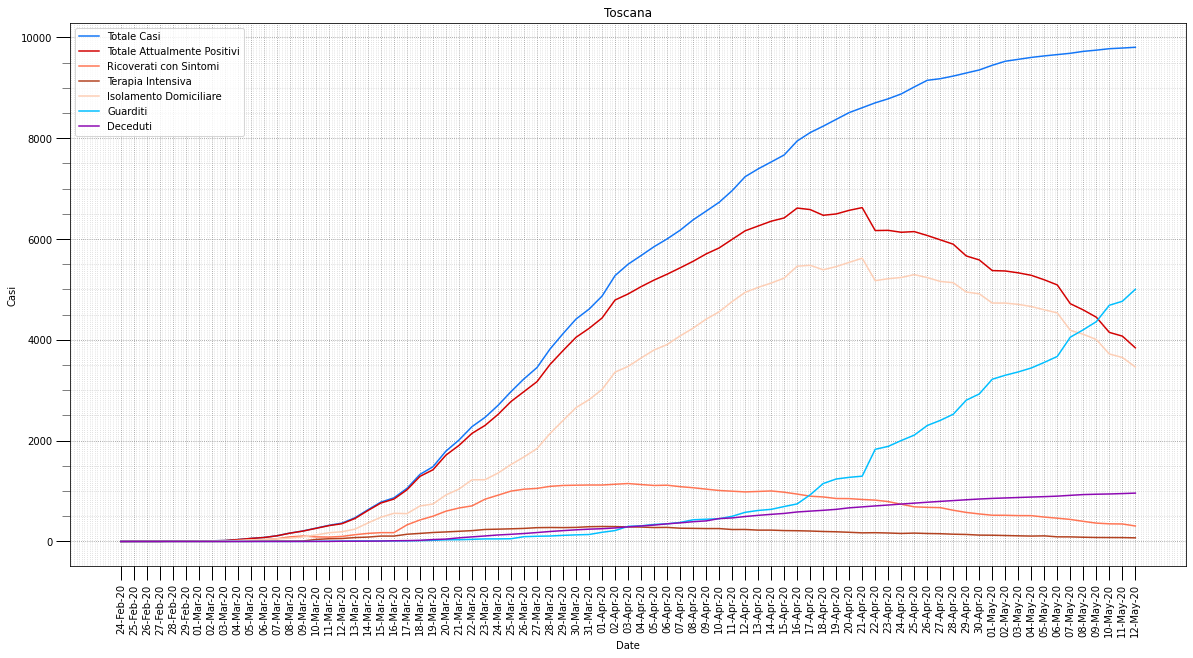

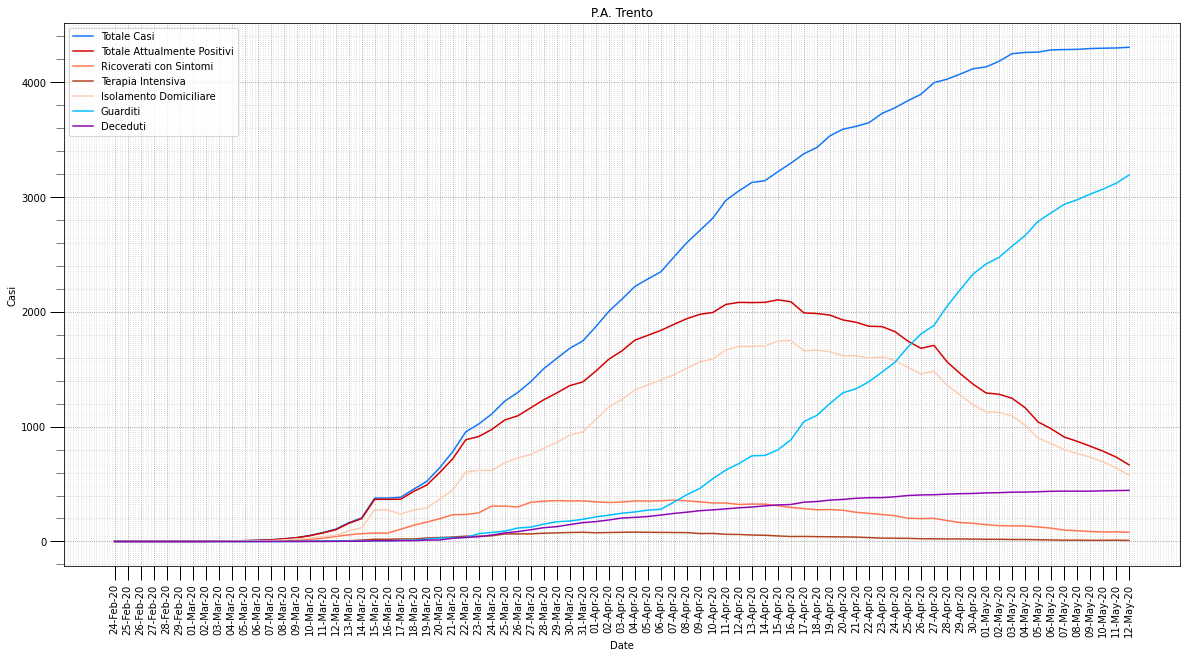

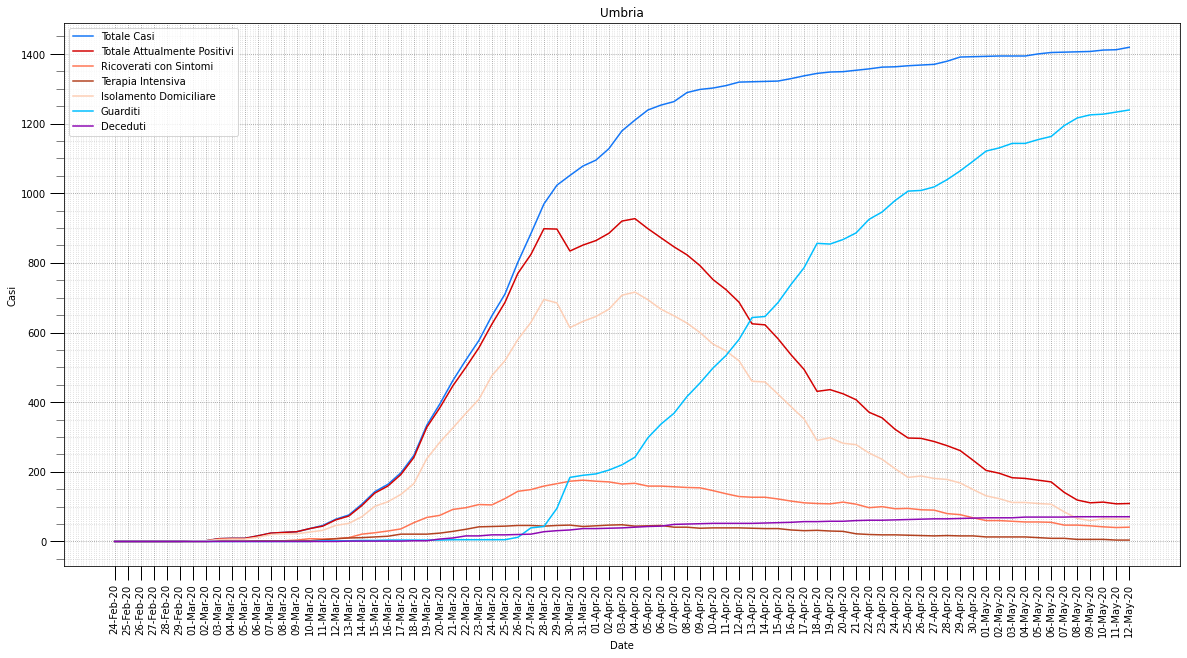

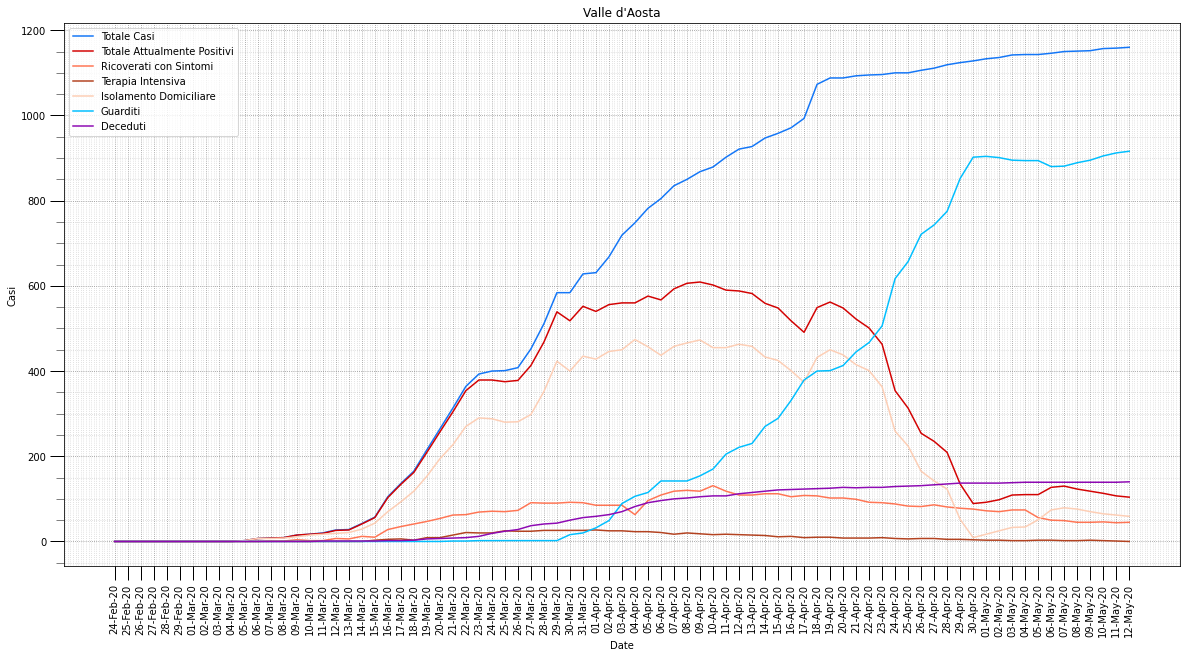

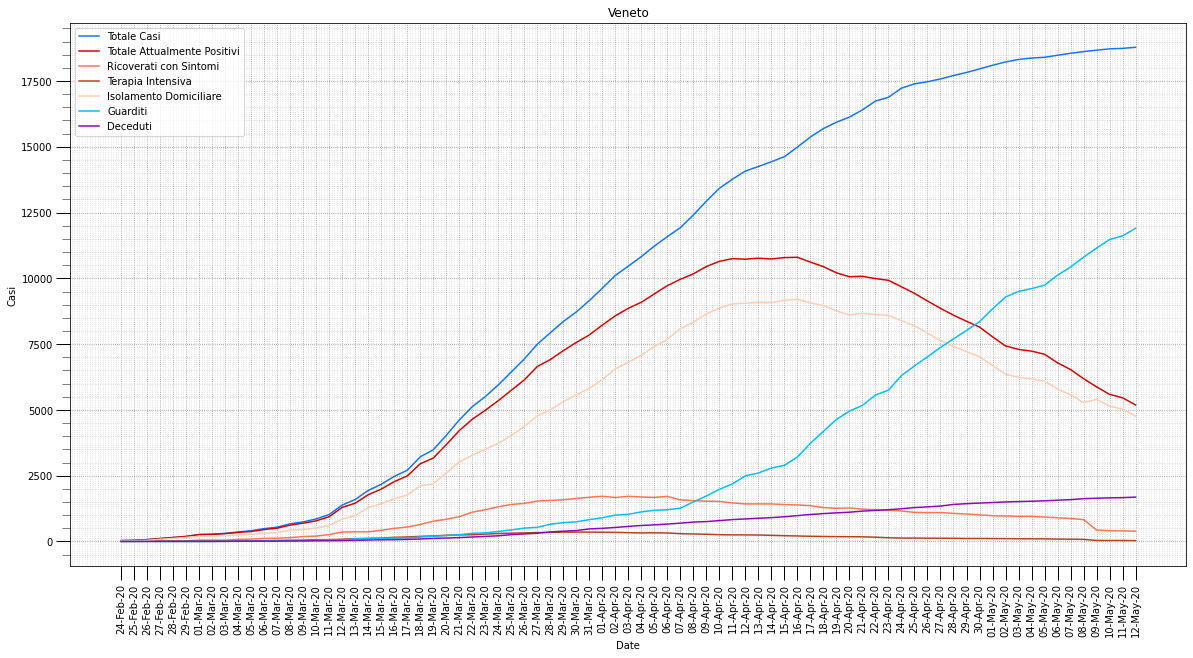

In [62]:

plot =['totale_casi','totale_attualmente_positivi','ricoverati_con_sintomi', 'terapia_intensiva','isolamento_domiciliare','dimessi_guariti','deceduti']
colors = [COL_TOTALE_CASI, COL_ATTUALMENTE_POSITIVI, COL_RICOVERATI, COL_TERAPIA_INTENSIVA, COL_ISOLAMENTO_DOMICILIARE, COL_GUARITI, COL_DECEDUTI]
legends = ["Totale Casi", "Totale Attualmente Positivi","Ricoverati con Sintomi","Terapia Intensiva","Isolamento Domiciliare","Guarditi", "Deceduti"]
for i,r in enumerate(regions[11:]):
    fig, ax = plt.subplots()
    for j,p in enumerate(plot):
        plt.plot(regions_data[r].index, regions_data[r][p], color=colors[j], label=legends[j])
    ax.set_title(r)
    ax.set_ylabel('Casi')
    ax.set_xticklabels(regions_data[r].index, rotation=90)    
    beautify_graph(ax)

### Lombardia andamento quotidiano

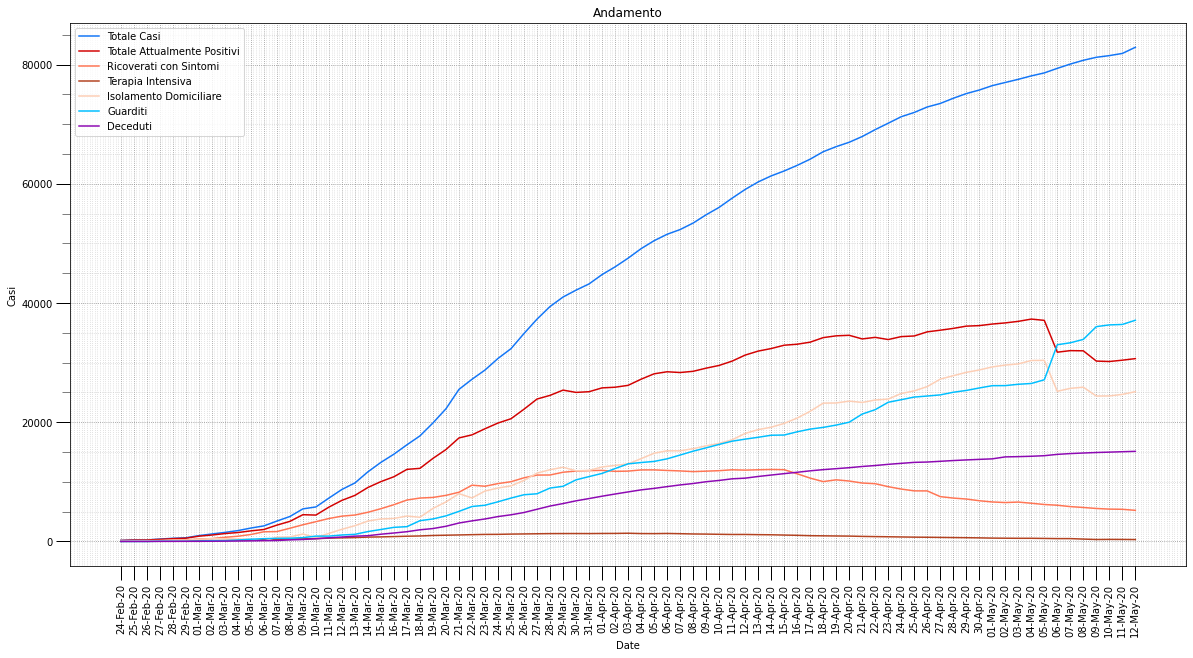

In [63]:
plot =['totale_casi','totale_attualmente_positivi','ricoverati_con_sintomi', 'terapia_intensiva','isolamento_domiciliare','dimessi_guariti','deceduti']
colors = [COL_TOTALE_CASI, COL_ATTUALMENTE_POSITIVI, COL_RICOVERATI, COL_TERAPIA_INTENSIVA, COL_ISOLAMENTO_DOMICILIARE, COL_GUARITI, COL_DECEDUTI]
legends = ["Totale Casi", "Totale Attualmente Positivi","Ricoverati con Sintomi","Terapia Intensiva","Isolamento Domiciliare","Guarditi", "Deceduti"]

fig, ax = plt.subplots()
for j,p in enumerate(plot):
    plt.plot(regions_data['Lombardia'].index, regions_data['Lombardia'][p], color=colors[j], label=legends[j])
ax.set_title('Andamento')
ax.set_ylabel('Casi')
ax.set_xticklabels(regions_data['Lombardia'].index, rotation=90)    
beautify_graph(ax)

In [64]:
lombardia = regions_data['Lombardia']

In [65]:
incremental_data = pd.DataFrame()
incremental_columns = ['totale_casi','nuovi_attualmente_positivi', 'dimessi_guariti', 'deceduti','totale_ospedalizzati',  'ricoverati_con_sintomi', 'terapia_intensiva',  'isolamento_domiciliare','tamponi']

for c in incremental_columns:
    if c in ['nuovi_attualmente_positivi','data']:
        incremental_data[c] = lombardia[c]
    else:
        incremental_data[c] = lombardia[c] - lombardia[c].shift(1)
        incremental_data[c] = incremental_data[c].astype(pd.Int64Dtype())
    
incremental_data

complete_incremental_data = incremental_data
incremental_data = incremental_data[1:]

### Casi totali giornalieri

In [66]:
show_table(incremental_data,15)

CASI TOTALI  DIFF. POSITIVI  GUARITI  DECEDUTI  TOT. RICOV.  \
data                                                                     
28-Apr-20          869             303      440       126         -270   
29-Apr-20          786             378      304       104         -181   
30-Apr-20          598              89      416        93         -315   
01-May-20          737             262      387        88         -248   
02-May-20          533             194       10       329         -117   
03-May-20          526             259      225        42           67   
04-May-20          577             381      133        63         -195   
05-May-20          500            -215      620        95         -236   
06-May-20          764           -5339     5881       222         -151   
07-May-20          720             262      324       134         -231   
08-May-20          634             -32      572        94         -226   
09-May-20          502           -1721     2138        85         -237   
10-May-20          282             -72      292        62          -89   
11-May-20          364             221       75        68          -38   
12-May-20         1033             264      707        62         -194   

           RICOVERATI  TERAPIA INT.  ISOLAME. DOM.  TAMPONI  
data                                                         
28-Apr-20        -245           -25            573     8573  
29-Apr-20        -160           -21            559    14472  
30-Apr-20        -286           -29            404    11048  
01-May-20        -206           -42            510    13701  
02-May-20         -99           -18            311    13058  
03-May-20          80           -13            192     7155  
04-May-20        -195             0            576     7978  
05-May-20        -213           -23             21     6455  
06-May-20        -122           -29          -5188    14516  
07-May-20        -231             0            493    15488  
08-May-20        -146           -80            194    10993  
09-May-20        -167           -70          -1484    11478  
10-May-20        -107            18             17     7369  
11-May-20         -31            -7            259     7508  
12-May-20        -175           -19            458    20602

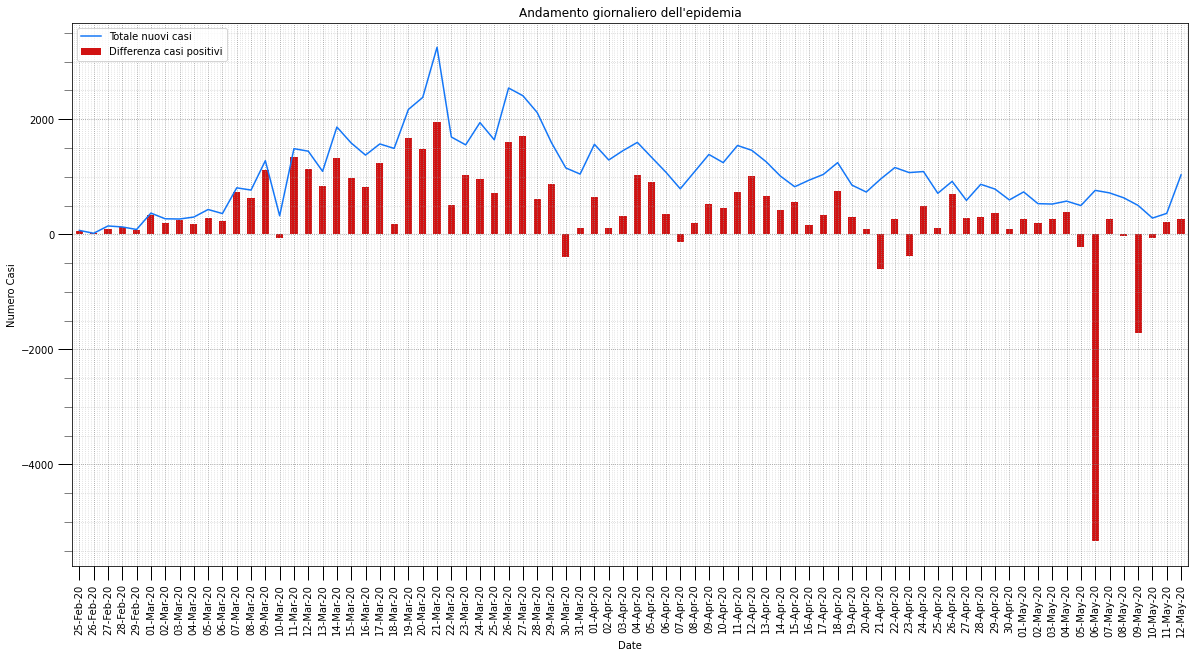

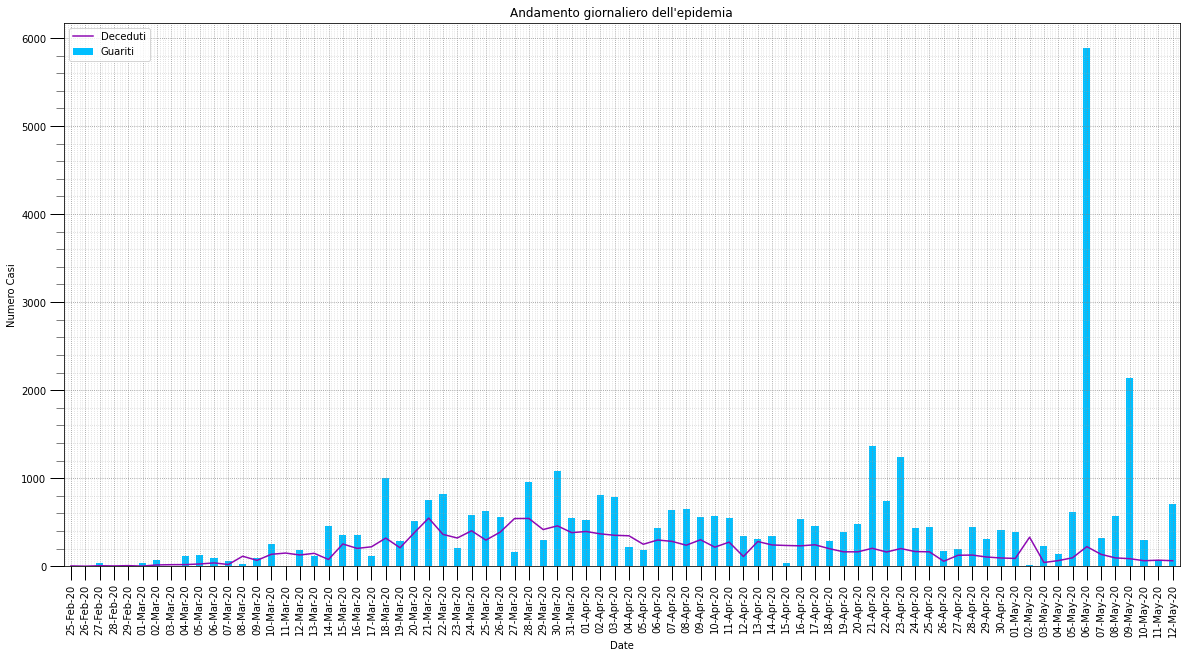

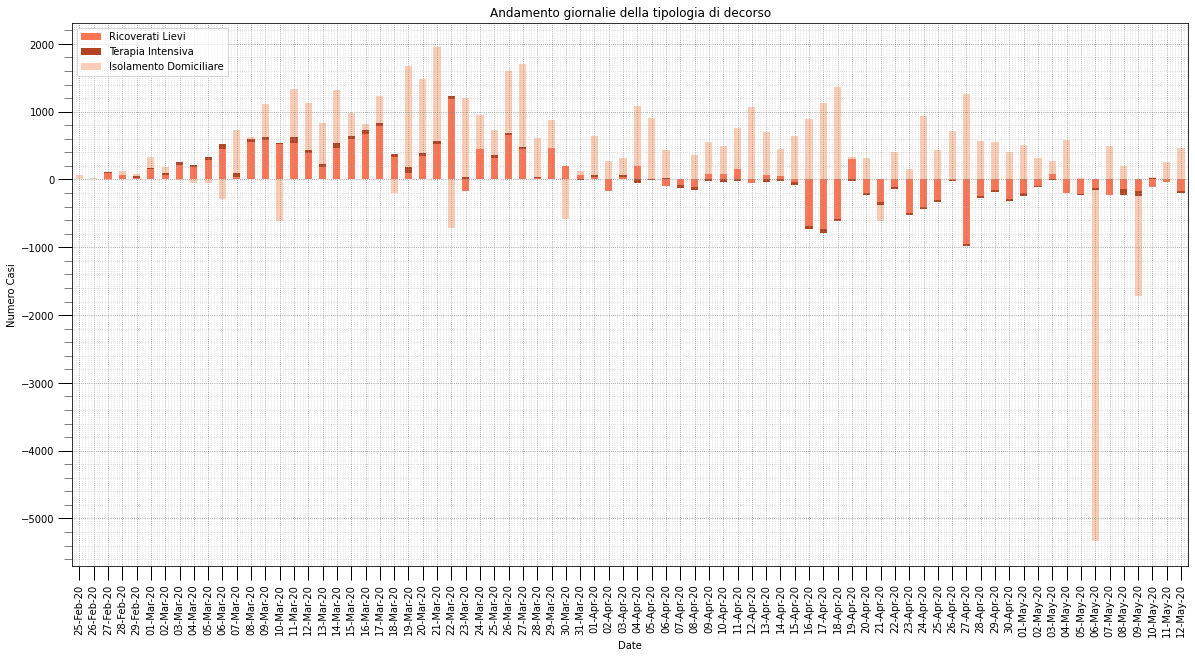

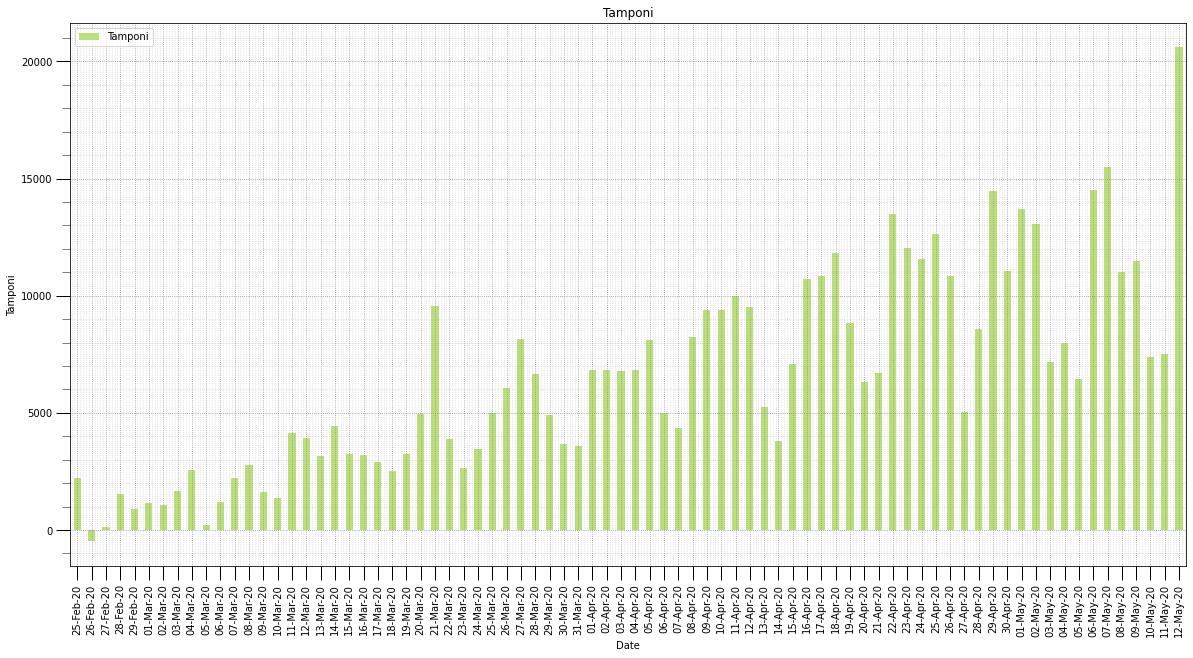

In [67]:
plot =['totale_casi']
legends = ["Totale nuovi casi"]
colors = [COL_TOTALE_CASI]
ax = incremental_data.plot(kind='line', y=plot, color=colors, rot=90, label=legends)
ax.set_ylabel('Numero Casi')
ax.set_title("Andamento giornaliero dell'epidemia")
beautify_graph(ax)

plot =['nuovi_attualmente_positivi']
legends = ["Differenza casi positivi"]
colors = [COL_DIFF_POSITIVI]
ay = incremental_data.plot(kind='bar',  y=plot, color=colors, rot=90, label=legends,  ax=ax)
beautify_graph(ay)


plot =['deceduti']
legends = ["Deceduti"]
colors = [COL_DECEDUTI]
ax = incremental_data.plot(kind='line', y=plot, color=colors, rot=90, label=legends)
ax.set_ylabel('Numero Casi')
ax.set_title("Andamento giornaliero dell'epidemia")
beautify_graph(ax)

plot =['dimessi_guariti']
legends = ["Guariti"]
colors = [COL_GUARITI]
ay = incremental_data.plot(kind='bar',  y=plot, color=colors, rot=90, label=legends, ax=ax)
beautify_graph(ay)


plot =['ricoverati_con_sintomi', 'terapia_intensiva','isolamento_domiciliare',]
legends = ["Ricoverati Lievi","Terapia Intensiva","Isolamento Domiciliare"]
colors = [COL_RICOVERATI, COL_TERAPIA_INTENSIVA, COL_ISOLAMENTO_DOMICILIARE]
az = incremental_data.plot(kind='bar', y=plot, color=colors, rot=90, stacked=True, label=legends)
az.set_title("Andamento giornalie della tipologia di decorso")
az.set_ylabel('Numero Casi')
beautify_graph(az)

plot =['tamponi']
legends = ["Tamponi"]
colors = [COL_TAMPONI,]
az = incremental_data.plot(kind='bar', y=plot, color=colors, rot=90, stacked=True, label=legends)
az.set_title("Tamponi")
az.set_ylabel('Tamponi')
beautify_graph(az)